# Part I - Exploration of DoorDash Delivery Data
## by Binyoh Langhe Theodore

## Introduction
> This dataset contains a subset of deliveries received at DoorDash in 2015 in a subset of the cities. The dataset is available on [Stratascratch](https://platform.stratascratch.com/data-projects/delivery-duration-prediction). Each row in this dataset corresponds to one unique delivery, and each column corresponds to a feature as explained below.

> **Note**: All money (dollar) values given in the data are in `cents` and all time duration values given are in `seconds`.


## Data Dictionary
### Time Features
- `market_id`: A city/region in which DoorDash operates, e.g., Los Angeles, given in the data as an id.
- `created_at`: Timestamp in UTC when the order was submitted by the consumer to DoorDash.
- `actual_delivery_time`: Timestamp in UTC when the order was delivered to the consumer.

### Store Features
- `store_id`: an id representing the restaurant the order was submitted for.
- `store_primary_category`: cuisine category of the restaurant, e.g., italian, asian.
- `order_protocol`: a store can receive orders from DoorDash through many modes. This field represents an id denoting the protocol.

### Order Features
- `total_items`: total number of items in the order.
- `subtotal`: total value of the order submitted (in cents).
- `num_distinct_items`: number of distinct items included in the order.
- `min_item_price`: price of the item with the least cost in the order (in cents).
- `max_item_price`: price of the item with the highest cost in the order (in cents).

### Market Features
- `total_onshift_dashers`: Number of available dashers who are within 10 miles of the store at the time of order creation
- `total_busy_dashers`: Subset of above total_onshift_dashers who are currently working on an order
- `total_outstanding_orders`: Number of orders within 10 miles of this order that are currently being processed.

### Predictions from Machine Learning Models
- `estimated_order_place_duration`: Estimated time for the restaurant to receive the order from DoorDash (in seconds).
- `estimated_store_to_consumer_driving_duration`: Estimated travel time between store and consumer (in seconds).



## Project Goal
The aim of this analytical exploration is to find out what factors affect delivery duration, and hence could be useful in predicting the delivery duration for any order. As such, I intend to answer the following questions:
- What features or variables affact delivery duration?
    - How do they relate to delivery duration and each other?
- Which markets/regions and/or protocols if any have a large proportion of orders with high delivery duration values?
- What can be done to reduce the frequency of orders with high delivery duration values? 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# setting seaborn plot theme
sns.set_style("darkgrid")

# setting default plot color
default_color = sns.color_palette()[0]
alt_color = sns.color_palette()[2]

### Preliminary Data Exploration


In [2]:
# read csv data to pandas dataframe
deliveries = pd.read_csv("./datasets/doordash-deliveries.csv")

# small overview of the data
deliveries.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [3]:
# small random samples of the data
deliveries.sample(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
139522,4.0,2015-02-15 19:58:22,2015-02-15 20:40:23,1796,fast,4.0,3,2178,3,479,1199,43.0,40.0,53.0,251,581.0
189835,3.0,2015-02-11 02:01:03,2015-02-11 02:45:50,6377,fast,4.0,5,4775,4,895,995,46.0,44.0,55.0,446,506.0
26420,4.0,2015-01-29 04:41:57,2015-01-29 05:10:06,606,chinese,5.0,2,1445,2,150,1295,50.0,46.0,49.0,251,808.0
179094,4.0,2015-01-30 01:49:01,2015-01-30 02:26:35,2389,chinese,3.0,8,5765,5,175,1495,92.0,76.0,108.0,251,564.0
4008,1.0,2015-02-05 03:40:11,2015-02-05 04:41:49,6126,burger,3.0,4,2932,4,349,849,34.0,41.0,57.0,251,456.0


In [4]:
# summary info of the data
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

After observing the summary info of the data, some datatype issues have been identified:
- **market_id**, and **order_protocol** are of the *float* datatype, but considering they are unique IDs, it'll be logical for them to be *int* or strings.
- **total_onshift_dashers**, **total_busy_dashers**, and **total_outstanding_orders** are also *float*, but it'll be more logical to have them as *int*, since they represent numerically discrete quantities.
- **created_at** and **actual_delivery_time** are string objects, but it'll be more convienient and preferred for them to be datetime fields.

In [5]:
# summary statistics of the data
deliveries.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


Just looking at the summary statistics of the data, some glaring logical and numerical/statistical issues in some columns have been indentified:
- The lowest subtotal value is zero, which implies there is at least one order amounting to 0 cents.
- Minimum item price has at least one negative value, since the lowest value is -86.
- Maximum item price has zero as the lowest value, implying some orders may have zero sum cost.
- The lowest value for total onshift dashers is -4, implying there is at least one negative entry for this field.
- Similarly, total busy dashers has at least one negative entry, since the lowest value in the column is -5.
- Total outstanding orders also has at least one negative entry, since the lowest value in the column is -6.

Given these issues, it'll be worth looking into orders wherein:
- the subtotal value is less than the maximum item price or subtotal value is less than the sum of maximum and minimum item prices for orders with more than one item (this should be impossible since the subtotal is the sum of the costs of each item in the order).
- the minimum item price is greater than the maximum item price.
- the total number of items is less than the number of distinct items.
- the actual delivery time is less than the time when the order was made (created_at column)

**Note**: It'll also be worth looking into the number of orders with minimum item price values equal to zero. This situation logically makes sense as some orders may have special discounts or coupons. However if the number of such orders is significant (say over 5-6% of all orders), then it could be a call for concern regarding profit margins.

In [6]:
# number of duplicate orders
deliveries.duplicated().sum()

0

In [7]:
# number of null entries for each column
deliveries.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

#### Deeper Dive into Identified Logical Issues

In [8]:
# orders with subtotal values equal to and under zero
zero_subtotal = deliveries.query('subtotal <= 0')
zero_subtotal

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
1070,4.0,2015-01-25 17:28:32,2015-01-25 18:03:00,517,american,3.0,7,0,7,295,1225,6.0,22.0,8.0,251,241.0
1837,2.0,2015-02-07 17:25:00,2015-02-07 17:55:00,6740,fast,4.0,5,0,2,169,200,19.0,13.0,13.0,251,512.0
3947,1.0,2015-01-31 01:42:46,2015-01-31 02:06:18,414,japanese,3.0,2,0,2,405,1395,16.0,16.0,16.0,251,200.0
4240,1.0,2015-02-12 19:15:20,2015-02-12 19:49:09,490,breakfast,3.0,1,0,1,1495,1495,16.0,16.0,20.0,251,556.0
7035,6.0,2015-02-16 02:20:18,2015-02-16 03:08:54,1025,thai,3.0,3,0,3,995,1295,NaN,NaN,NaN,251,870.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190853,1.0,2015-01-28 02:21:37,2015-01-28 03:02:12,2169,indian,3.0,5,0,5,350,1195,51.0,53.0,62.0,251,478.0
192276,4.0,2015-02-08 04:23:01,2015-02-08 06:00:42,5956,filipino,1.0,2,0,2,625,963,5.0,6.0,16.0,446,513.0
192751,1.0,2015-01-26 03:54:50,2015-01-26 04:27:15,440,burger,3.0,5,0,3,800,1800,38.0,39.0,39.0,251,365.0
193233,5.0,2015-02-14 02:34:45,2015-02-14 04:05:37,5020,latin-american,1.0,1,0,1,1200,1200,26.0,24.0,41.0,446,568.0


In [9]:
# number of orders with subtotal values equal to and under zero
zero_subtotal.shape[0]

179

In [10]:
# orders with subtotal value less than max item price
subtotal_under_max_item_price = deliveries.query('subtotal < max_item_price')
subtotal_under_max_item_price

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
592,2.0,2015-02-02 20:47:42,2015-02-02 21:21:56,4062,barbecue,3.0,1,1076,1,1141,1236,36.0,34.0,40.0,251,661.0
790,1.0,2015-01-29 02:59:28,2015-01-29 03:44:09,132,fast,4.0,3,1003,3,-86,1066,24.0,29.0,38.0,251,721.0
1070,4.0,2015-01-25 17:28:32,2015-01-25 18:03:00,517,american,3.0,7,0,7,295,1225,6.0,22.0,8.0,251,241.0
1144,5.0,2015-01-31 20:10:47,2015-01-31 20:49:29,4215,NaN,1.0,1,1289,1,1437,1400,21.0,13.0,19.0,446,198.0
1149,5.0,2015-01-30 02:20:58,2015-01-30 03:14:42,4215,NaN,1.0,1,1828,1,2031,1935,24.0,21.0,23.0,446,976.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193944,6.0,2015-01-31 02:42:31,2015-01-31 03:22:46,2143,japanese,5.0,1,1131,1,1124,1211,122.0,123.0,234.0,251,412.0
194839,6.0,2015-02-12 05:20:30,2015-02-12 05:43:10,831,mediterranean,3.0,2,205,2,922,1789,NaN,NaN,NaN,251,646.0
195154,2.0,2015-02-07 02:08:48,2015-02-07 03:15:46,3194,pizza,3.0,1,3095,1,3306,3313,62.0,43.0,78.0,251,740.0
195912,2.0,2015-02-16 19:16:42,2015-02-16 20:23:02,4862,sandwich,5.0,1,782,1,1011,1071,36.0,39.0,61.0,251,596.0


In [11]:
# number of orders with subtotal value less than max item price
subtotal_under_max_item_price.shape[0]

542

In [12]:
# orders with subtotal values lower than the sum of corresponding maximum item price plus minimum item price
subtotal_under_max_plus_min_price = deliveries.query('(subtotal < max_item_price + min_item_price) & num_distinct_items > 1')
subtotal_under_max_plus_min_price

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
24,1.0,2015-02-16 02:21:20,2015-02-16 03:54:14,5058,italian,1.0,3,3400,3,1400,2100,22.0,21.0,39.0,446,501.0
286,1.0,2015-01-30 03:54:32,2015-01-30 04:42:59,1019,chinese,1.0,2,3228,2,1546,1812,33.0,32.0,41.0,446,808.0
490,5.0,2015-01-26 20:36:47,2015-01-26 21:22:29,2527,greek,3.0,2,1171,2,459,1139,21.0,37.0,32.0,251,745.0
839,1.0,2015-02-03 22:30:55,2015-02-03 23:44:49,1807,vietnamese,1.0,2,1454,2,666,1019,11.0,12.0,8.0,446,620.0
1070,4.0,2015-01-25 17:28:32,2015-01-25 18:03:00,517,american,3.0,7,0,7,295,1225,6.0,22.0,8.0,251,241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195795,1.0,2015-02-09 03:59:41,2015-02-09 04:58:03,1377,dessert,4.0,2,1193,2,614,713,61.0,54.0,82.0,251,487.0
196618,5.0,2015-02-07 05:37:46,2015-02-07 06:13:09,4063,NaN,1.0,2,2800,2,600,2800,13.0,8.0,8.0,446,205.0
197116,4.0,2015-01-31 23:05:08,2015-01-31 23:34:45,1409,vietnamese,5.0,2,1295,2,375,1295,39.0,19.0,20.0,251,611.0
197360,1.0,2015-01-24 02:07:11,2015-01-24 02:52:35,2956,fast,4.0,2,1256,2,674,762,70.0,76.0,94.0,251,555.0


In [13]:
# number of orders with subtotal values lower than the sum of corresponding maximum item price plus minimum item price
subtotal_under_max_plus_min_price.shape[0]

933

In [14]:
# orders with negative minimum item price entries
neg_min_item_price = deliveries.query("min_item_price < 0")
neg_min_item_price

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
790,1.0,2015-01-29 02:59:28,2015-01-29 03:44:09,132,fast,4.0,3,1003,3,-86,1066,24.0,29.0,38.0,251,721.0
1351,2.0,2015-02-06 05:26:55,2015-02-06 06:15:41,6740,fast,4.0,35,1786,4,-1,488,33.0,36.0,52.0,251,587.0
46369,2.0,2015-02-08 23:20:59,2015-02-08 23:50:03,777,fast,4.0,25,1636,5,-35,514,81.0,61.0,72.0,251,469.0
46378,2.0,2015-02-08 06:02:12,2015-02-08 06:32:58,777,fast,4.0,15,1822,4,-48,433,36.0,36.0,43.0,251,339.0
77238,5.0,2015-02-14 22:01:48,2015-02-14 23:15:15,2276,pizza,3.0,1,3099,1,-31,52,22.0,26.0,34.0,251,377.0
91319,3.0,2015-02-15 20:46:57,2015-02-15 21:43:42,707,american,4.0,16,1601,5,-13,194,29.0,17.0,22.0,251,875.0
104173,3.0,2015-01-25 19:18:20,2015-01-25 20:37:08,1950,breakfast,3.0,7,6095,7,-30,1211,18.0,23.0,12.0,251,878.0
119785,1.0,2015-01-24 03:45:37,2015-01-24 04:42:59,2998,fast,4.0,10,1938,8,-9,594,28.0,40.0,46.0,251,551.0
119854,1.0,2015-02-10 03:31:22,2015-02-10 04:02:08,2054,italian,5.0,5,2585,3,-7,1235,49.0,47.0,59.0,251,333.0
165821,2.0,2015-02-02 20:24:15,2015-02-02 20:55:06,86,fast,4.0,18,1646,3,-6,297,49.0,41.0,37.0,251,638.0


In [15]:
# number of orders with negative minimum item price
neg_min_item_price.shape[0]

13

In [16]:
# orders with minimum item price values equal to zero
zero_min_item_price = deliveries.query("min_item_price == 0")
zero_min_item_price

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
448,6.0,2015-01-28 19:50:12,2015-01-28 20:41:22,2652,sandwich,1.0,7,2503,4,0,1199,NaN,NaN,NaN,446,275.0
450,6.0,2015-02-17 19:38:04,2015-02-17 20:02:27,2652,sandwich,1.0,3,1274,3,0,375,NaN,NaN,NaN,446,74.0
714,2.0,2015-01-28 01:20:44,2015-01-28 02:08:24,1148,indian,3.0,2,1368,2,0,1200,30.0,29.0,32.0,251,583.0
798,1.0,2015-02-16 01:16:49,2015-02-16 02:52:49,132,fast,4.0,24,3190,8,0,699,17.0,17.0,24.0,251,585.0
801,1.0,2015-02-03 03:36:16,2015-02-03 05:13:04,132,fast,4.0,7,1223,5,0,649,22.0,22.0,48.0,251,384.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196531,1.0,2015-01-28 19:33:39,2015-01-28 19:58:24,6235,fast,4.0,13,487,4,0,209,7.0,6.0,5.0,251,257.0
196815,4.0,2015-01-21 19:57:24,2015-01-21 20:32:29,6964,pizza,3.0,2,1395,2,0,695,44.0,41.0,56.0,251,199.0
197200,1.0,2015-02-15 22:15:36,2015-02-15 22:42:14,3803,fast,4.0,9,946,5,0,299,24.0,17.0,17.0,251,383.0
197201,1.0,2015-02-09 05:16:26,2015-02-09 05:48:49,3803,fast,4.0,6,348,3,0,169,20.0,20.0,18.0,251,624.0


In [17]:
# number of orders with minimum item price equal to zero
zero_min_item_price.shape[0]

2539

In [18]:
# percent proportion of orders with min item price equal to zero
zero_min_item_price.shape[0]/deliveries.shape[0] * 100

1.286038454525194

In [19]:
# orders with max item price equal to or under zero
zero_max_item_price = deliveries.query('max_item_price <= 0')
zero_max_item_price

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
20220,1.0,2015-02-09 18:23:31,2015-02-09 19:31:54,959,mexican,1.0,1,575,1,0,0,7.0,8.0,9.0,446,352.0
20222,1.0,2015-01-22 17:57:08,2015-01-22 18:54:37,959,mexican,1.0,1,575,1,0,0,11.0,5.0,4.0,446,350.0
20225,1.0,2015-02-13 18:41:31,2015-02-13 19:30:39,959,mexican,1.0,1,575,1,0,0,12.0,12.0,15.0,446,376.0
20227,1.0,2015-01-21 19:36:57,2015-01-21 20:23:45,959,mexican,1.0,1,560,1,0,0,19.0,20.0,29.0,446,519.0
20228,1.0,2015-02-13 02:37:10,2015-02-13 03:13:44,959,dim-sum,5.0,1,595,1,0,0,61.0,59.0,75.0,446,548.0
78076,5.0,2015-01-27 02:26:45,2015-01-27 02:56:56,2276,pizza,3.0,1,2418,1,0,0,43.0,41.0,36.0,251,495.0
87613,1.0,2015-01-21 19:50:42,2015-01-21 20:24:07,2432,sandwich,1.0,2,1090,2,0,0,21.0,21.0,31.0,446,377.0


In [20]:
# number of orders with max item price equal to or under zero
zero_max_item_price.shape[0]

7

In [21]:
# orders where total item count is less than number of distinct items
total_item_count_under_num_distinct_items = deliveries.query('total_items < num_distinct_items')
total_item_count_under_num_distinct_items

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration


In [22]:
# dashers columns
dasher_cols = ['total_onshift_dashers', 'total_busy_dashers']

# orders with logically erroneous dasher count values (negative total onshift and total busy dasher count values, and orders where total busy dasher count is higher than total onshift dasher count)
dashers_error = deliveries.query('total_onshift_dashers < 0 | total_busy_dashers < 0 | total_busy_dashers > total_onshift_dashers')
dashers_error[dasher_cols]

,total_onshift_dashers,total_busy_dashers
1,1.0,2.0
7,7.0,8.0
14,5.0,6.0
18,4.0,9.0
20,12.0,13.0
...,...,...
197411,5.0,6.0
197412,10.0,11.0
197418,26.0,29.0
197422,23.0,24.0


In [23]:
# number of orders with logically erroneous dasher count entries
dashers_error.shape[0]

40414

In [24]:
# percent proportion of orders with logically erroneous dasher count entries
dashers_error.shape[0]/deliveries.shape[0] * 100

20.470247381323826

In [25]:
# let's look specifically at orders with negative total onshift and total busy dasher counts
neg_onshift_busy_dashers = deliveries.query('total_onshift_dashers < 0 | total_busy_dashers < 0')
neg_onshift_busy_dashers

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
6034,3.0,2015-02-14 01:48:58,2015-02-14 03:00:13,90,american,1.0,2,3538,2,1238,1606,-2.0,2.0,10.0,446,266.0
7997,1.0,2015-02-08 15:41:45,2015-02-08 16:35:01,6172,sandwich,3.0,1,1514,1,1116,1063,1.0,-1.0,3.0,251,650.0
12888,3.0,2015-01-21 21:02:32,2015-01-21 21:41:03,2649,catering,2.0,1,986,1,892,827,-2.0,5.0,1.0,251,787.0
22673,1.0,2015-02-10 19:35:28,2015-02-10 20:28:51,4906,japanese,1.0,2,1578,2,441,803,0.0,-1.0,9.0,446,735.0
24662,1.0,2015-01-29 05:09:24,2015-01-29 05:41:44,3264,catering,3.0,1,1237,1,984,978,5.0,-1.0,7.0,251,466.0
26395,3.0,2015-02-08 18:28:15,2015-02-08 19:17:31,2772,fast,3.0,2,1327,1,680,615,-1.0,6.0,6.0,251,368.0
26627,1.0,2015-02-13 03:18:12,2015-02-13 04:23:16,5266,burger,1.0,6,5773,6,554,1926,10.0,-1.0,6.0,446,552.0
30897,3.0,2015-02-07 19:55:46,2015-02-07 20:46:27,793,hawaiian,1.0,1,1202,1,987,1092,-1.0,9.0,5.0,446,773.0
33154,1.0,2015-02-02 22:27:36,2015-02-03 00:08:43,1337,american,1.0,2,2831,2,681,635,-1.0,13.0,16.0,446,394.0
33276,1.0,2015-02-12 00:38:22,2015-02-12 01:04:33,418,steak,1.0,2,6083,2,2907,3199,9.0,-1.0,5.0,446,427.0


In [26]:
# number of orders with negative total onshift and total busy dasher counts
neg_onshift_busy_dashers.shape[0]

41

In [27]:
# percent proportion of orders with logically erroneous dasher count entries
neg_onshift_busy_dashers.shape[0]/deliveries.shape[0] * 100

0.02076706444881172

In [28]:
# let's also look specifically at orders where the total busy dasher count is higher than total onshift dasher count
onshift_under_busy_dashers = deliveries.query('total_onshift_dashers < total_busy_dashers')
onshift_under_busy_dashers

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0
18,1.0,2015-01-31 04:35:54,2015-01-31 05:47:30,2841,italian,1.0,2,3150,2,1425,1725,4.0,9.0,12.0,446,548.0
20,1.0,2015-01-31 23:45:12,2015-02-01 00:14:05,4139,mexican,1.0,5,1285,3,150,400,12.0,13.0,11.0,446,424.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197411,1.0,2015-02-02 17:50:23,2015-02-02 18:12:57,2956,fast,4.0,2,1297,2,369,639,5.0,6.0,7.0,251,186.0
197412,1.0,2015-02-10 23:43:08,2015-02-11 00:47:24,2956,fast,4.0,1,674,1,345,345,10.0,11.0,12.0,251,706.0
197418,1.0,2015-01-30 20:50:23,2015-01-30 22:24:38,2956,fast,4.0,2,1528,2,639,729,26.0,29.0,34.0,251,791.0
197422,1.0,2015-01-31 19:48:15,2015-01-31 20:27:39,2956,fast,4.0,7,2445,3,145,585,23.0,24.0,24.0,251,608.0


In [29]:
# number of orders where total onshift dasher count is less than that of total busy dashers
onshift_under_busy_dashers.shape[0]

40394

In [30]:
# percent proprtion of orders where total onshift dasher count is less than that of total busy dashers
onshift_under_busy_dashers.shape[0]/deliveries.shape[0] * 100

20.460117105982942

A significant majority of the identified logical issues in the data are as a result of orders wherein the value of total onshift dasher count is less than the count of total busy dashers. Such errors account for almost `20.5%` of all the data.

In [31]:
neg_outstanding_orders = deliveries.query('total_outstanding_orders < 0')
neg_outstanding_orders

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
4989,1.0,2015-02-18 00:36:21,2015-02-18 01:12:28,1811,smoothie,2.0,2,1940,1,840,856,11.0,14.0,-2.0,251,460.0
19438,3.0,2015-02-03 03:04:22,2015-02-03 04:21:43,275,fast,4.0,3,1778,2,158,869,7.0,10.0,-2.0,251,743.0
20454,1.0,2015-01-25 21:15:30,2015-01-25 21:51:23,4237,asian,1.0,3,2039,3,393,798,9.0,7.0,-1.0,446,393.0
23029,1.0,2015-02-08 19:49:17,2015-02-08 21:10:48,5572,korean,1.0,2,1641,2,754,1217,5.0,2.0,-1.0,446,537.0
36317,1.0,2015-01-31 17:32:31,2015-01-31 18:04:30,3169,fast,4.0,3,617,2,258,365,6.0,6.0,-6.0,251,217.0
44415,1.0,2015-01-27 01:50:34,2015-01-27 02:23:54,4496,other,1.0,3,2258,2,126,837,24.0,8.0,-2.0,446,317.0
46884,1.0,2015-02-17 02:55:02,2015-02-17 04:41:16,3158,american,4.0,1,1317,1,1058,1042,6.0,7.0,-3.0,251,528.0
50842,1.0,2015-01-21 18:46:51,2015-01-21 19:25:30,1916,american,1.0,1,4314,1,4147,4077,9.0,-2.0,-5.0,446,738.0
56554,3.0,2015-01-23 00:25:58,2015-01-23 01:13:54,1608,pizza,1.0,3,1963,2,562,855,2.0,5.0,-6.0,446,801.0
68176,1.0,2015-02-18 01:50:48,2015-02-18 02:46:53,5104,chinese,5.0,4,3146,4,468,945,2.0,5.0,-3.0,251,964.0


In [32]:
neg_outstanding_orders.shape[0]

44

In [33]:
# number of unique market id values
deliveries['market_id'].nunique()

6

In [34]:
# unique market id values
deliveries['market_id'].unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.])

In [35]:
deliveries['market_id'].value_counts()

2.0    55058
4.0    47599
1.0    38037
3.0    23297
5.0    18000
6.0    14450
Name: market_id, dtype: int64

In [36]:
deliveries['market_id'].value_counts(normalize=True).mul(100)

2.0    28.027754
4.0    24.230685
1.0    19.363066
3.0    11.859541
5.0     9.163057
6.0     7.355898
Name: market_id, dtype: float64

In [37]:
# number of unique store ids
deliveries['store_id'].nunique()

6743

### Data Cleaning

In [38]:
# creating copies of the dataset for cleaning and subsequent operations
deliveries_clean = deliveries.copy()
df = deliveries.copy()

In [39]:
# summary info of the data showing column datatypes
deliveries_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

#### Identified Issue
First we'll start with improper datatypes for certain columns namely: **market_id, created_at, actual_delivery_time, order_protocol, total_onshift_dashers, total_busy_dashers, total_outstanding_orders**.


#### Define
- Change the **market_id, order_protocol, total_onshift_dashers, total_busy_dashers, total_outstanding_orders** columns from float to int.
- Change the **created_at, actual_delivery_time** columns from string objects to datatetime.

But first we'll make sure that none of the float columns have values with significant figures after the decimal point.


#### Code

In [40]:
# checking for number of rows having corresponding float column values with significant figures after the decimal point
float_cols = [col for col in deliveries_clean.columns if deliveries_clean[col].dtype == "float64"]

print("Number of rows with corresponding column values having significant figures after the decimal point:\n")
for col in float_cols:
    num_cols = deliveries_clean[col].dropna().astype(str).apply(lambda x: int(x[x.find(".") + 1:]) > 0).sum()
    print(f"{col}: {num_cols}")

Number of rows with corresponding column values having significant figures after the decimal point:

market_id: 0
order_protocol: 0
total_onshift_dashers: 0
total_busy_dashers: 0
total_outstanding_orders: 0
estimated_store_to_consumer_driving_duration: 0


Since the estimated_store_to_consumer_driving_duration column also has no values with significant figures after the decimal point, it'll also be changed from float to int datatype.

In [41]:
# converting all float columns to in datatype
for col in float_cols:
    deliveries_clean = deliveries_clean.astype({col: "Int64"}, errors="ignore")

In [42]:
# converting date data columns to datetime datatype
date_cols = deliveries_clean.columns[1:3].tolist()

deliveries_clean[date_cols] = deliveries_clean[date_cols].apply(pd.to_datetime)

#### Test

In [43]:
# making sure all the columns with datatype issues have been converted accordingly
datatype_cols = float_cols + date_cols

deliveries_clean[datatype_cols].dtypes

market_id                                                Int64
order_protocol                                           Int64
total_onshift_dashers                                    Int64
total_busy_dashers                                       Int64
total_outstanding_orders                                 Int64
estimated_store_to_consumer_driving_duration             Int64
created_at                                      datetime64[ns]
actual_delivery_time                            datetime64[ns]
dtype: object

Now we can check for orders where the actual delivery time is less than the time when the order was made.

In [44]:
# checking if there are any orders where the actual delivery time is less than the time when the order was made
deliveries_clean.query('actual_delivery_time < created_at')

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration


#### Identified Issues
There exist orders with:
- subtotal values less than or equal to zero (179).
- subtotal values less than max_item_price values (542).
- subtotal values less the sum of min_item_price and max_item_price values wherein there are more than one total number of items in the order (933).
- min_item_price values less than zero (13).
- max_item_price values equal to zero (7).
- negative values for total_onshift_dashers and/or total_busy_dashers (41).
- negative values for total_outstanding_order (44).
- total_onshift_dashers values less than total_busy_dashers values (40394).


#### Define
- For the first seven cases, all such records will be droppped since they don't account for a large enough proportion of the overall data to significantly influence analytical procedures and likely outcomes.
- The last case though accounts for almost 20.5% of the overall data, so the values of the total_onshift_dashers and total_busy_dashers columns will be swapped, since that's most likely where the error comes from.


#### Code

In [45]:
deliveries_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  Int64         
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  Int64         
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [46]:
# getting all orders with the first 7 above-mentioned logical data issues
error_deliveries = deliveries_clean.query('subtotal <= 0 | subtotal < max_item_price | (subtotal < max_item_price + min_item_price & num_distinct_items > 1) | min_item_price < 0 | max_item_price <= 0 | max_item_price < min_item_price | total_onshift_dashers < 0 | total_busy_dashers < 0 | total_outstanding_orders < 0')
error_deliveries

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
24,1,2015-02-16 02:21:20,2015-02-16 03:54:14,5058,italian,1,3,3400,3,1400,2100,22,21,39,446,501
166,6,2015-01-31 01:35:23,2015-01-31 02:16:43,976,breakfast,2,2,1741,2,889,772,<NA>,<NA>,<NA>,251,597
273,4,2015-01-24 03:03:18,2015-01-24 04:02:30,5081,mexican,1,1,1403,1,1314,1292,129,127,205,251,464
286,1,2015-01-30 03:54:32,2015-01-30 04:42:59,1019,chinese,1,2,3228,2,1546,1812,33,32,41,446,808
490,5,2015-01-26 20:36:47,2015-01-26 21:22:29,2527,greek,3,2,1171,2,459,1139,21,37,32,251,745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197143,4,2015-02-03 02:57:44,2015-02-03 03:41:32,1409,vietnamese,5,2,2082,2,1020,928,88,87,150,251,390
197360,1,2015-01-24 02:07:11,2015-01-24 02:52:35,2956,fast,4,2,1256,2,674,762,70,76,94,251,555
197385,1,2015-01-30 19:24:55,2015-01-30 20:03:21,2956,fast,4,1,1142,1,737,701,22,19,32,251,347
197400,1,2015-02-06 19:35:47,2015-02-06 20:33:29,2956,fast,4,2,1401,2,691,755,37,27,39,251,690


In [47]:
# dropping orders with logical errors
deliveries_clean.drop(index=error_deliveries.index, axis=1, inplace=True)

#### Test

In [48]:
# checking if the columns have dropped as expected
deliveries_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195353 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     194379 non-null  Int64         
 1   created_at                                    195353 non-null  datetime64[ns]
 2   actual_delivery_time                          195346 non-null  datetime64[ns]
 3   store_id                                      195353 non-null  int64         
 4   store_primary_category                        190653 non-null  object        
 5   order_protocol                                194371 non-null  Int64         
 6   total_items                                   195353 non-null  int64         
 7   subtotal                                      195353 non-null  int64         
 8   num_distinct_items                            195353 n

#### Code

For the last scenario we will proceed to swap the column values.

In [49]:
# orders with total onshift dashers less than total busy dashers
onshift_dashers_under_busy_dashers = deliveries_clean.query('total_busy_dashers > total_onshift_dashers')
onshift_dashers_under_busy_dashers

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
1,2,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2,1,1900,1,1400,1400,1,2,2,446,690
7,3,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1,4,4850,4,750,1800,7,8,7,446,626
14,1,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1,1,1525,1,1525,1525,5,6,8,446,795
18,1,2015-01-31 04:35:54,2015-01-31 05:47:30,2841,italian,1,2,3150,2,1425,1725,4,9,12,446,548
20,1,2015-01-31 23:45:12,2015-02-01 00:14:05,4139,mexican,1,5,1285,3,150,400,12,13,11,446,424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197411,1,2015-02-02 17:50:23,2015-02-02 18:12:57,2956,fast,4,2,1297,2,369,639,5,6,7,251,186
197412,1,2015-02-10 23:43:08,2015-02-11 00:47:24,2956,fast,4,1,674,1,345,345,10,11,12,251,706
197418,1,2015-01-30 20:50:23,2015-01-30 22:24:38,2956,fast,4,2,1528,2,639,729,26,29,34,251,791
197422,1,2015-01-31 19:48:15,2015-01-31 20:27:39,2956,fast,4,7,2445,3,145,585,23,24,24,251,608


In [50]:
# number of orders where total onshift dashers is less than total busy dashers
onshift_dashers_under_busy_dashers.shape[0]

39797

In [51]:
# swapping values between total_onshift_dashers and total_busy_dashers columns that respect the boolean mask condition
mask = deliveries_clean['total_onshift_dashers'] < deliveries_clean['total_busy_dashers']

deliveries_clean.loc[mask, ['total_onshift_dashers', 'total_busy_dashers']] = deliveries_clean.loc[mask, ['total_busy_dashers', 'total_onshift_dashers']].values

#### Test

In [52]:
# making sure there are no more orders with possibly swapped onshift and busy dasher count values
deliveries_clean.query('total_onshift_dashers < total_busy_dashers')

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration


In [53]:
# summary info of the cleaned dataset
deliveries_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195353 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     194379 non-null  Int64         
 1   created_at                                    195353 non-null  datetime64[ns]
 2   actual_delivery_time                          195346 non-null  datetime64[ns]
 3   store_id                                      195353 non-null  int64         
 4   store_primary_category                        190653 non-null  object        
 5   order_protocol                                194371 non-null  Int64         
 6   total_items                                   195353 non-null  int64         
 7   subtotal                                      195353 non-null  int64         
 8   num_distinct_items                            195353 n

In [54]:
# summary statistics of the cleaned data
deliveries_clean.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,194379.0,195353.000000,194371.0,195353.000000,195353.000000,195353.000000,195353.000000,195353.000000,179269.0,179269.0,179269.0,195353.000000,194831.0
mean,2.978789,3530.325564,2.883918,3.209554,2693.461068,2.681126,682.994067,1158.570972,46.607238,39.989714,58.093496,308.429899,545.293167
std,1.524563,2053.274325,1.503374,2.671454,1826.351549,1.633032,519.810231,557.297013,35.399579,30.932333,52.688728,90.090830,219.368019
min,1.0,1.000000,1.0,1.000000,95.000000,1.000000,0.000000,60.000000,0.0,0.0,0.0,0.000000,0.0
25%,2.0,1686.000000,1.0,2.000000,1415.000000,1.000000,299.000000,799.000000,18.0,14.0,17.0,251.000000,382.0
50%,3.0,3592.000000,3.0,3.000000,2218.000000,2.000000,595.000000,1095.000000,39.0,33.0,41.0,251.000000,544.0
75%,4.0,5299.000000,4.0,4.000000,3400.000000,3.000000,942.000000,1395.000000,68.0,60.0,85.0,446.000000,702.0
max,6.0,6987.000000,7.0,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.0,148.0,285.0,2715.000000,2088.0


In [55]:
# number of missing values per column in the cleaned dataset
deliveries_clean.isna().sum()

market_id                                         974
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4700
order_protocol                                    982
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16084
total_busy_dashers                              16084
total_outstanding_orders                        16084
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      522
dtype: int64

In [56]:
# orders with missing actual delivery time values
deliveries_clean.query('actual_delivery_time == "NaN"')

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
109,3,2015-02-10 21:51:54,NaT,1698,sandwich,3,1,1125,1,975,975,7,5,4,251,488
7670,2,2015-02-08 02:54:42,NaT,2340,japanese,2,4,2860,3,390,690,131,123,197,251,723
78511,4,2015-02-15 02:15:45,NaT,901,catering,1,9,5050,6,375,1125,91,75,167,446,770
115982,4,2015-02-16 01:52:49,NaT,1107,pizza,3,2,2094,2,599,1195,53,53,102,251,433
140635,2,2015-02-15 02:21:42,NaT,1661,dessert,1,3,4210,3,865,1850,123,91,176,446,862
158967,2,2015-02-01 01:21:29,NaT,314,mexican,5,5,3447,3,225,1349,90,88,109,251,572
170416,5,2015-02-01 01:36:33,NaT,2651,fast,4,3,982,3,165,575,41,31,31,251,333


Considering that delivery duration (and by extension actual delivery time) is the focus of this analysis, and that there's no easily identifiable pattern for this scenario, we can drop the few orders with missing actual_delivery_time values. 

In [57]:
# dropping orders with missing actual delivery time values
deliveries_clean.dropna(subset=['actual_delivery_time'], inplace=True)

In [58]:
# making sure there are no more orders with missing actual delivery time values
deliveries_clean.isna().sum()

market_id                                         974
created_at                                          0
actual_delivery_time                                0
store_id                                            0
store_primary_category                           4700
order_protocol                                    982
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16084
total_busy_dashers                              16084
total_outstanding_orders                        16084
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      522
dtype: int64

#### Feature Engineering New Columns to Dataset
- free_dashers_ratio ((total_onshift_dashers - total_busy_dashers) / total_onshift_dashers)
- delivery_duration (actual_delivery_time - created_at) (in seconds)
- estimated_order_to_delivery_duration (estimated_order_place_duration + estimated_store_to_consumer_driving_duration)

In [59]:
# adding free_dashers_ratio column (total_onshift_dashers - total_busy_dashers)
deliveries_clean.insert(13, 'free_dashers_ratio', (deliveries_clean['total_onshift_dashers'] - deliveries_clean['total_busy_dashers'])/deliveries_clean['total_onshift_dashers'])

In [60]:
# adding delivery_duration ins seconds (actual_delivery_time - created_at)
deliveries_clean.insert(3, 'delivery_duration', (deliveries_clean['actual_delivery_time'] - deliveries_clean['created_at']).dt.seconds)

In [61]:
# time taken from order creation to order delivery
deliveries_clean['estimated_order_to_delivery_duration'] = deliveries_clean['estimated_order_place_duration'] + deliveries_clean['estimated_store_to_consumer_driving_duration']

In [62]:
# data summary info to check if the new columns have been added
deliveries_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195346 entries, 0 to 197427
Data columns (total 19 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     194372 non-null  Int64         
 1   created_at                                    195346 non-null  datetime64[ns]
 2   actual_delivery_time                          195346 non-null  datetime64[ns]
 3   delivery_duration                             195346 non-null  int64         
 4   store_id                                      195346 non-null  int64         
 5   store_primary_category                        190646 non-null  object        
 6   order_protocol                                194364 non-null  Int64         
 7   total_items                                   195346 non-null  int64         
 8   subtotal                                      195346 n

In [63]:
deliveries_clean.head()

,market_id,created_at,actual_delivery_time,delivery_duration,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,free_dashers_ratio,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,estimated_order_to_delivery_duration
0,1,2015-02-06 22:24:17,2015-02-06 23:27:16,3779,1845,american,1,4,3441,4,557,1239,33,14,0.575758,21,446,861,1307
1,2,2015-02-10 21:49:25,2015-02-10 22:56:29,4024,5477,mexican,2,1,1900,1,1400,1400,2,1,0.5,2,446,690,1136
2,3,2015-01-22 20:39:28,2015-01-22 21:09:09,1781,5477,NaN,1,1,1900,1,1900,1900,1,0,1.0,0,446,690,1136
3,3,2015-02-03 21:21:45,2015-02-03 22:13:00,3075,5477,NaN,1,6,6900,5,600,1800,1,1,0.0,2,446,289,735
4,3,2015-02-15 02:40:36,2015-02-15 03:20:26,2390,5477,NaN,1,3,3900,3,1100,1600,6,6,0.0,9,446,650,1096


In [64]:
# summary statistics of the engineered clean dataset
deliveries_clean.describe()

,market_id,delivery_duration,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,free_dashers_ratio,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,estimated_order_to_delivery_duration
count,194372.0,195346.000000,195346.000000,194364.0,195346.000000,195346.000000,195346.000000,195346.000000,195346.000000,179262.0,179262.0,179262.0,179262.0,195346.00000,194824.0,194824.0
mean,2.978783,2862.632488,3530.397438,2.883924,3.209531,2693.456390,2.681115,683.000143,1158.572768,46.606068,39.988676,<NA>,58.09138,308.42996,545.291299,853.741012
std,1.524576,1181.474596,2053.271006,1.503377,2.671460,1826.364374,1.633038,519.815683,557.301897,35.398816,30.931629,<NA>,52.686938,90.09090,219.369105,235.084568
min,1.0,101.000000,1.000000,1.0,1.000000,95.000000,1.000000,0.000000,60.000000,0.0,0.0,<NA>,0.0,0.00000,0.0,153.0
25%,2.0,2105.000000,1686.000000,1.0,2.000000,1415.000000,1.000000,299.000000,799.000000,18.0,14.0,<NA>,17.0,251.00000,382.0,682.0
50%,3.0,2661.000000,3592.000000,3.0,3.000000,2218.000000,2.000000,595.000000,1095.000000,39.0,33.0,<NA>,41.0,251.00000,544.0,850.0
75%,4.0,3382.000000,5299.000000,4.0,4.000000,3400.000000,3.000000,942.000000,1395.000000,68.0,60.0,<NA>,85.0,446.00000,702.0,1017.0
max,6.0,73282.000000,6987.000000,7.0,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.0,148.0,<NA>,285.0,2715.00000,2088.0,3222.0


Since this data is a subset of DoorDash deliveries in 2015, let's look at the time period (months) this data covers.

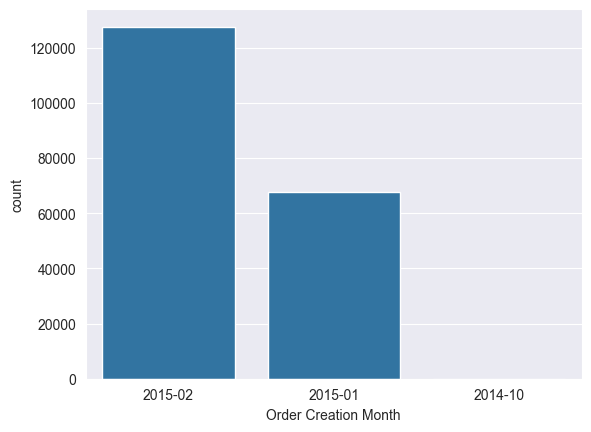

In [65]:
# let's look at the time period during which the orders were made
month_var = deliveries_clean['created_at'].dt.to_period('M')  # month when orders were placed
sns.countplot(data=deliveries_clean, x=month_var, color=default_color)
plt.xlabel("Order Creation Month");

#### Identified Issue
There seems to be an anomaly, with at least one order having the wrong creation date, so we'll have to look into it.


#### Define
Drop all orders not occuring in 2015


#### Code

In [66]:
# orders with the order creation year anomaly(ies)
error_date = deliveries_clean[deliveries_clean['created_at'].dt.year != 2015]
error_date

,market_id,created_at,actual_delivery_time,delivery_duration,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,free_dashers_ratio,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,estimated_order_to_delivery_duration
2690,1,2014-10-19 05:24:15,2015-01-25 19:11:54,49659,3560,italian,1,1,1695,1,1595,1595,<NA>,<NA>,<NA>,<NA>,446,412,858


In [67]:
# checking if any such anomalies exist for the actual delivery date column
deliveries_clean[deliveries_clean['actual_delivery_time'].dt.year != 2015]

,market_id,created_at,actual_delivery_time,delivery_duration,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,free_dashers_ratio,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,estimated_order_to_delivery_duration


In [68]:
# we can safely drop this order and proceed with the analysis
deliveries_clean.drop(index=error_date.index, axis=1, inplace=True)

#### Test

In [69]:
# making sure the erroneous order date is dropped
deliveries_clean[deliveries_clean['created_at'].dt.year != 2015]

,market_id,created_at,actual_delivery_time,delivery_duration,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,free_dashers_ratio,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,estimated_order_to_delivery_duration


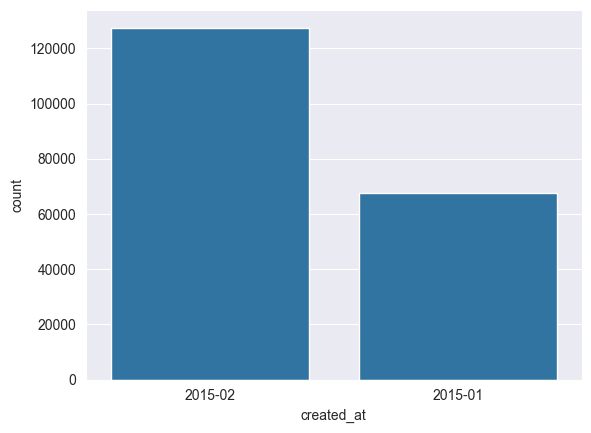

In [70]:
# let's look once more at the time period during which the orders were made
month_var = deliveries_clean['created_at'].dt.to_period('M')
sns.countplot(data=deliveries_clean, x=month_var, color=default_color);

This dataset comprises DoorDash orders/deliveries within the months of January and February 2015, with February comprising over 65% of all orders in the data, and January comprising under 35%.

In [71]:
# one more look at the summary info of the data
deliveries_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195345 entries, 0 to 197427
Data columns (total 19 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     194371 non-null  Int64         
 1   created_at                                    195345 non-null  datetime64[ns]
 2   actual_delivery_time                          195345 non-null  datetime64[ns]
 3   delivery_duration                             195345 non-null  int64         
 4   store_id                                      195345 non-null  int64         
 5   store_primary_category                        190645 non-null  object        
 6   order_protocol                                194363 non-null  Int64         
 7   total_items                                   195345 non-null  int64         
 8   subtotal                                      195345 n

In [72]:
# one more look at the summary statistics of the data
deliveries_clean.describe()

,market_id,delivery_duration,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,free_dashers_ratio,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,estimated_order_to_delivery_duration
count,194371.0,195345.000000,195345.000000,194363.0,195345.000000,195345.000000,195345.000000,195345.000000,195345.000000,179262.0,179262.0,179262.0,179262.0,195345.000000,194823.0,194823.0
mean,2.978793,2862.392930,3530.397287,2.883934,3.209542,2693.461501,2.681123,682.995475,1158.570534,46.606068,39.988676,<NA>,58.09138,308.429256,545.291983,853.740991
std,1.524573,1176.723769,2053.276261,1.503375,2.671462,1826.367652,1.633038,519.812918,557.302449,35.398816,30.931629,<NA>,52.686938,90.090593,219.36946,235.085171
min,1.0,101.000000,1.000000,1.0,1.000000,95.000000,1.000000,0.000000,60.000000,0.0,0.0,<NA>,0.0,0.000000,0.0,153.0
25%,2.0,2105.000000,1686.000000,1.0,2.000000,1415.000000,1.000000,299.000000,799.000000,18.0,14.0,<NA>,17.0,251.000000,382.0,682.0
50%,3.0,2661.000000,3592.000000,3.0,3.000000,2218.000000,2.000000,595.000000,1095.000000,39.0,33.0,<NA>,41.0,251.000000,544.0,850.0
75%,4.0,3382.000000,5299.000000,4.0,4.000000,3400.000000,3.000000,942.000000,1395.000000,68.0,60.0,<NA>,85.0,446.000000,702.0,1017.0
max,6.0,73282.000000,6987.000000,7.0,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.0,148.0,<NA>,285.0,2715.000000,2088.0,3222.0


### Saving Cleaned Dataset

In [73]:
# saving the cleaned dataset to csv
deliveries_clean.to_csv("./export/doordash-deliveries-cleaned.csv", index_label=False)

In [74]:
deliveries_clean.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'delivery_duration',
       'store_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers', 'free_dashers_ratio',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration',
       'estimated_order_to_delivery_duration'],
      dtype='object')

### What is the structure of your dataset?

> There are **197428** orders/deliveries and **16** features in the original dataset, though I've engineered 3 more features that I believe would aid me in my analysis.
Most of the features are numerical ('delivery_duration', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'free_dashers_ratio', 'total_outstanding_orders', 'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration', 'estimated_order_to_delivery_duration'), while some ('market_id', 'store_id', 'store_primary_category', 'order_protocol') are categorical, and the other 2 ('created_at' and 'actual_delivery_time') are datetime features.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in finding out which features are most useful for predicting , or that might affect delivery duration i.e., the time taken between an order being made (created_at) and when the order is actually delivered (actual_delivery_time).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the estimated order creation to delivery duration, ratio of free dashers to onshift dashers (free_dashers_ratio), and subtotal will have the strongest effect on the delivery duration. Also, total outstanding orders might affect the delivery duration to some extent.

## Univariate Exploration

In [75]:
# detailed plot labelling function
def plot_label(title, x_label, y_label, legend=False, legend_title=None, legend_loc=1, anchor=None, x_rot=0):
    """
    adds labels to chart and chart elements
    
    title (str, mandatory): chart title
    x_label (str, mandatory): x-axis title/label
    y_label (str, mandatory): y-axis title/label
    legend (bool, optional): adds legend to chart
    legend_title (str, optional): adds/modifies the plot's legend title
    legend_loc (int/str, optional): sets the location of the plot legend
    anchor (tuple (int, int)): sets the location of the plot legend relative to plot itself
    x_rot (int, optional): rotates tick labels of x-axis by number of specified degrees
    """
    try:
        plt.title(title)
        plt.xlabel(x_label, fontweight="bold")
        plt.ylabel(y_label, fontweight="bold")
        plt.xticks(rotation=x_rot)
        if legend:
            plt.legend(title=legend_title, loc=legend_loc, bbox_to_anchor=anchor)
    except:
        print("Input valid arguments")

In [76]:
# axis labelling function
def axes_label(x_label, y_label="", x_rot=0, x_lim=False, lim_val=None, x_ticks=False, tick_val=None):
    """
    adds/modifies plot axes labels
    x_label (str, mandatory): x-axis title/label
    y_label (str, optional): y-axis title/label
    x_rot (int, optional): rotates tick labels of x-axis by number of specified degrees
    """
    try:
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.xticks(rotation=x_rot)
        if x_lim:
            plt.xlim(lim_val)
        if x_ticks:
            plt.xticks(tick_val)
    except:
        return "Input valid arguments"

In [77]:
# legend labelling function
def legend_label(leg_title, anchor="upper right"):
    """"
    small function to aid labelling plot legends
    leg_title (str, mandatory): adds/modifies legend title
    anchor (str/list, optional): specifies the location of the legend with respect to the plot
    """
    try:
        plt.legend(title=leg_title, bbox_to_anchor=anchor)
    except:
        return "Input valid arguments"

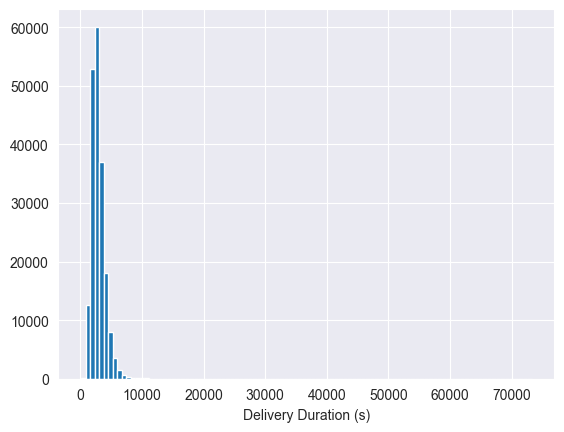

In [78]:
# first let's look at the main feature of interest: delivery duration (in seconds)
deliveries_clean['delivery_duration'].hist(bins=100)
axes_label(x_label="Delivery Duration (s)");

The delivery duration's distribution is heavily skewed ti the right, with a wide range of values greater than 10k all the way up over 70k seconds appearing to be outliers. A log transform might help us figure out if the distribution shape changes.

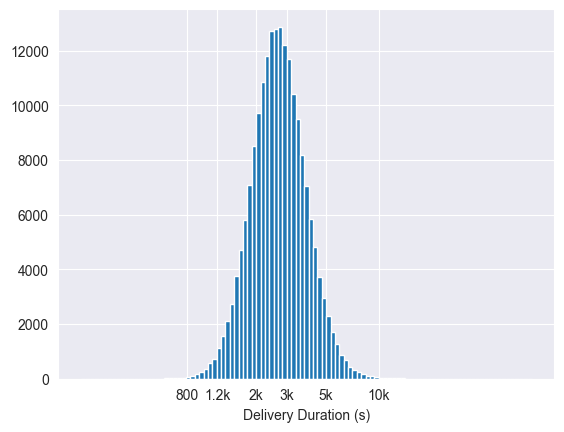

In [79]:
# given the long tail on the original distribution, let's plot it on a log scale
log_binsize = 0.025
bins = 10 ** np.arange(2.3, np.log10(deliveries_clean['delivery_duration'].max())+log_binsize, log_binsize)

deliveries_clean['delivery_duration'].hist(bins=bins)
axes_label(x_label="Delivery Duration (s)")
plt.xscale("log")
plt.xticks([8e2, 1.2e3, 2e3, 3e3, 5e3, 1e4], [800, '1.2k', '2k', '3k', '5k', '10k']);

After applying a log transformation on delivery duration, the distribution appears normal with a wide range of values both to the left (below 800) and right (10k) that appear to be outliers. Using an x-scale limit might help clarify where these outliers may lie.

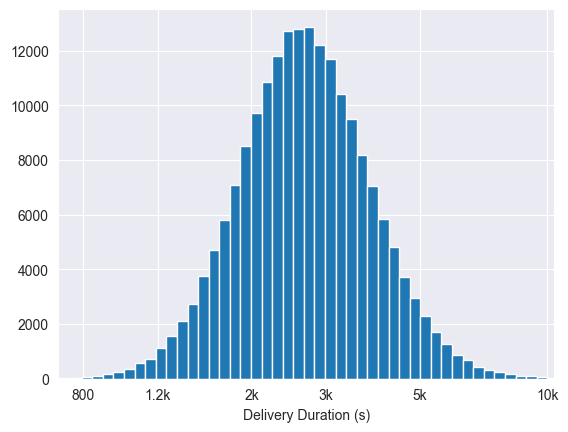

In [80]:
# let's limit the log scale to remove outlier values
log_binsize = 0.025
bins = 10 ** np.arange(2.3, np.log10(deliveries_clean['delivery_duration'].max())+log_binsize, log_binsize)

deliveries_clean['delivery_duration'].hist(bins=bins)
axes_label(x_label="Delivery Duration (s)", x_ticks=True, x_lim=True, lim_val=[7e2, 1.04e4])
plt.xscale("log")
plt.xticks([8e2, 1.2e3, 2e3, 3e3, 5e3, 1e4], [800, '1.2k', '2k', '3k', '5k', '10k']);

Delivery duration has a long tailed distribution, with most orders having delivery durations under 10000 (10k) seconds. When plotted on a log scale, the delivery duration distribution looks more normal, peaking roughly between 2.2k and 3.1k seconds.

In [81]:
# orders with outlier delivery duration values 
duration_outliers = deliveries_clean.query('delivery_duration > 10000 | delivery_duration < 700')
duration_outliers

,market_id,created_at,actual_delivery_time,delivery_duration,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,free_dashers_ratio,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,estimated_order_to_delivery_duration
862,2,2015-01-25 21:59:08,2015-01-25 22:02:51,223,1904,sandwich,2,1,1195,1,1195,1195,74,60,0.189189,51,251,218,469
1812,4,2015-02-04 21:24:24,2015-02-04 21:35:21,657,1269,dessert,2,1,540,1,440,440,25,24,0.04,32,251,108,359
2517,4,2015-01-29 20:44:13,2015-01-30 01:57:42,18809,6045,fast,3,1,779,1,559,559,77,72,0.064935,109,251,649,900
2921,2,2015-01-30 20:42:02,2015-01-30 23:41:42,10780,1997,indian,2,1,1299,1,1299,1299,49,35,0.285714,45,251,372,623
5567,3,2015-02-03 21:30:37,2015-02-04 01:07:53,13036,4766,vietnamese,6,7,5034,6,195,999,25,24,0.04,25,251,260,511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194547,4,2015-02-09 22:27:20,2015-02-09 22:38:15,655,1409,vietnamese,5,2,1070,2,275,795,24,13,0.458333,14,251,242,493
194711,4,2015-02-06 22:02:16,2015-02-06 22:11:18,542,1409,thai,5,1,825,1,750,750,27,23,0.148148,22,251,557,808
194831,1,2015-02-02 02:32:55,2015-02-02 06:20:40,13665,6340,dessert,1,8,8725,5,495,1950,21,18,0.142857,30,446,1218,1664
196925,1,2015-02-05 02:11:36,2015-02-05 05:04:44,10388,5658,japanese,3,7,8025,7,600,1600,24,24,0.0,23,251,1085,1336


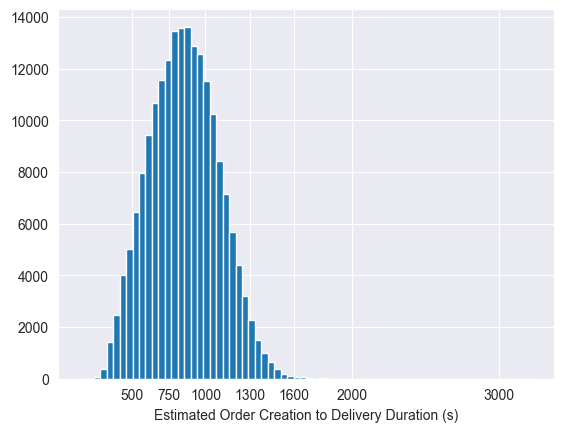

In [82]:
# let's look at the first predictor variable of interest: estimated order creation to delivery duration (in seconds)
deliveries_clean['estimated_order_to_delivery_duration'].hist(bins=70)
axes_label(x_label="Estimated Order Creation to Delivery Duration (s)", x_ticks=True, tick_val=[500, 750, 1e3, 1.3e3, 1.6e3, 2e3, 3e3]);

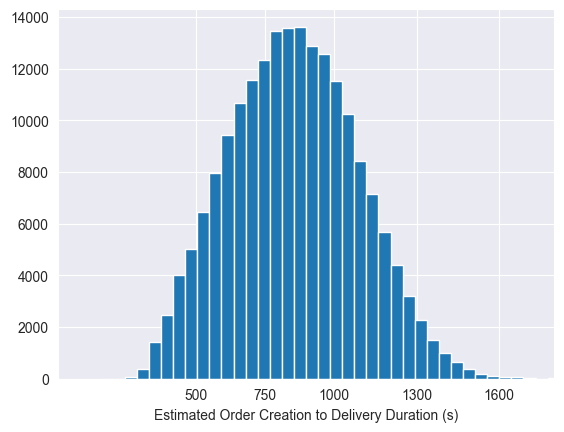

In [83]:
# let's limit the x-axis to 1800 seconds of order creation to delivery duration
deliveries_clean['estimated_order_to_delivery_duration'].hist(bins=70)
axes_label(x_label="Estimated Order Creation to Delivery Duration (s)", x_lim=True, lim_val=[0, 1800], x_ticks=True, tick_val=[500, 750, 1e3, 1.3e3, 1.6e3]);

The distribution of estimated store to consumer drive duration looks fairly normal though skewed to the right, peaking between 750 to 900 seconds.

In [84]:
# orders with outlier order creation to delivery duration values
order_del_duration_outliers = deliveries_clean.query('estimated_order_to_delivery_duration > 1800')
order_del_duration_outliers

,market_id,created_at,actual_delivery_time,delivery_duration,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,free_dashers_ratio,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,estimated_order_to_delivery_duration
7975,3,2015-02-02 02:39:32,2015-02-02 04:54:45,8113,4703,thai,3,2,1990,2,695,1295,33,30,0.090909,68,251,2088,2339
7984,3,2015-02-02 01:03:25,2015-02-02 03:21:25,8280,4703,thai,3,5,2690,4,100,1095,30,30,0.0,44,251,1680,1931
24309,1,2015-01-30 02:44:55,2015-01-30 04:06:50,4915,2279,japanese,1,1,800,1,800,800,23,21,0.086957,33,446,1397,1843
27843,4,2015-01-27 19:57:56,2015-01-27 20:36:06,2290,4812,american,3,1,809,1,659,659,36,36,0.0,49,251,1711,1962
36974,4,2015-01-22 19:13:15,2015-01-22 20:40:32,5237,3755,NaN,3,1,1100,1,1100,1100,51,50,0.019608,113,1740,726,2466
39787,4,2015-02-05 15:58:05,2015-02-05 16:27:37,1772,2991,breakfast,3,1,1145,1,1145,1145,2,1,0.5,3,251,1667,1918
56641,2,2015-01-22 02:16:49,2015-01-22 03:07:14,3025,2794,italian,3,2,4598,2,2199,2399,97,77,0.206186,114,1299,670,1969
62953,6,2015-01-25 00:33:52,2015-01-25 01:55:34,4902,6633,pizza,1,2,1700,2,500,1200,<NA>,<NA>,<NA>,<NA>,446,1416,1862
63710,6,2015-01-26 02:00:31,2015-01-26 03:04:52,3861,2259,NaN,1,4,3435,4,595,995,<NA>,<NA>,<NA>,<NA>,446,1359,1805
70166,2,2015-01-22 02:21:15,2015-01-22 03:27:12,3957,6805,other,3,3,2375,3,600,1000,52,46,0.115385,65,880,1144,2024


In [85]:
# number of orders with outlier order creation to delivery duration values
order_del_duration_outliers.shape[0]

28

In [86]:
# now we can look at the second predictor variable of interest
# number of unique values for order subtotal (in cents)
deliveries_clean['subtotal'].nunique()

8340

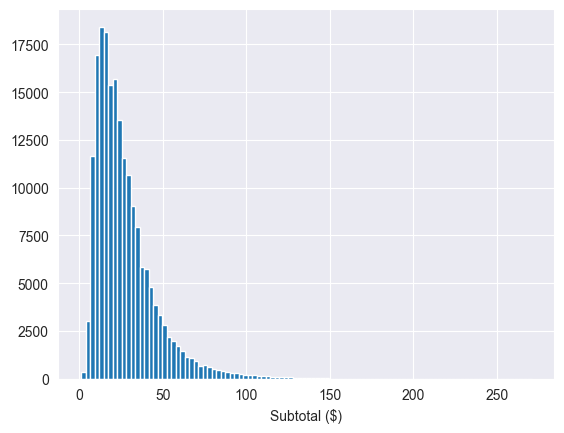

In [87]:
# let's plot the distribution of the subtotal amount (in dollars)
deliveries_clean['subtotal'].div(100).hist(bins=100)
axes_label(x_label="Subtotal ($)");

Order subtotal amount has a long tailed distribution peaking early on then trailing off with a wide range of values to the right of the distribution that appear to be outliers.

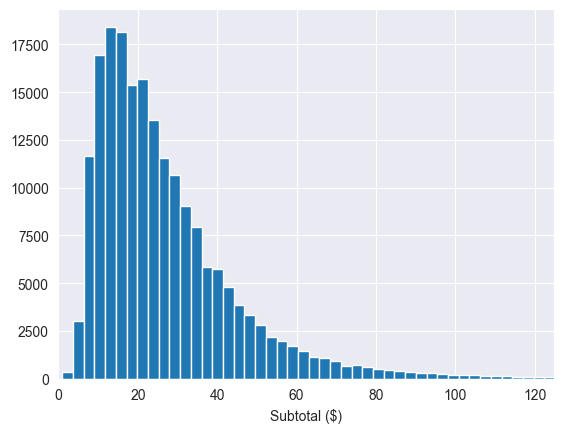

In [88]:
# there's a long tail, so let's limit the x-axis scale and take a closer look
deliveries_clean['subtotal'].div(100).hist(bins=100)
axes_label(x_label="Subtotal ($)", x_lim=True, lim_val=[0, 125]);

Given the long tailed distribution of subtotal amount per order, we could perhaps see more clearly if we limit the x-scale a little.

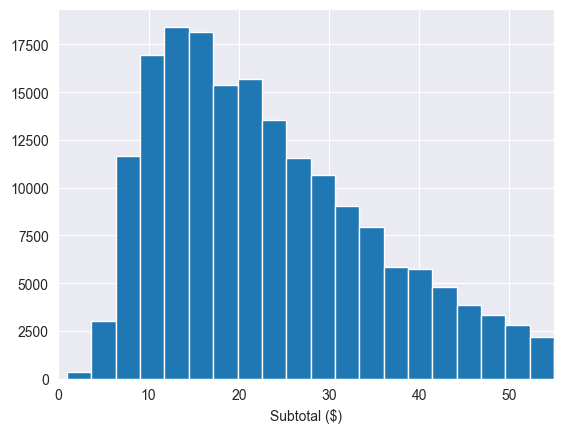

In [89]:
# let's dig even deeper into the distribution of the subtotal amount (in dollars)
deliveries_clean['subtotal'].div(100).hist(bins=100)
axes_label(x_label="Subtotal ($)", x_lim=True, lim_val=[0, 55]);

As far as the subtotal amount is concerned, the frequency increases somewhat gradually to $6, then spikes sharply at about $9, spikes a little more at about $11, peaks at about $13 drops very slightly at about $16, drops a fair bit at about $18, then trails off thereafter.

My interest in this feature is mostly motivated by the fact that orders that cost more might likely be made higher priority deliveries. So I expect subtotal might better help in predicting delivery duration when compared to total item count and number of distinct items of the order.

In [90]:
# orders with outlier subtotal values
subtotal_outliers = deliveries_clean.query('subtotal > 12500')
subtotal_outliers

,market_id,created_at,actual_delivery_time,delivery_duration,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,free_dashers_ratio,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,estimated_order_to_delivery_duration
23,1,2015-02-02 05:27:49,2015-02-02 07:05:09,5840,5058,italian,1,7,14900,5,1200,3900,11,8,0.272727,11,446,901,1347
1088,4,2015-02-07 22:06:36,2015-02-07 23:05:30,3534,5152,breakfast,2,3,14700,3,3600,3600,38,37,0.026316,38,251,544,795
2751,1,2015-01-29 21:47:53,2015-01-29 22:41:22,3209,6126,burger,3,18,12976,3,539,829,17,17,0.0,21,251,971,1222
2762,1,2015-01-28 00:27:05,2015-01-28 01:42:47,4542,6126,burger,3,24,13516,4,249,829,12,11,0.083333,18,251,971,1222
2961,1,2015-01-29 20:52:27,2015-01-29 22:18:17,5150,2938,pizza,1,12,13150,8,500,1095,17,16,0.058824,11,446,768,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194989,1,2015-01-29 18:35:35,2015-01-29 19:58:23,4968,3976,pizza,5,12,13753,4,679,1149,7,6,0.142857,8,251,791,1042
195808,2,2015-01-23 19:44:48,2015-01-23 20:29:00,2652,4862,sandwich,5,13,12774,9,250,1221,52,52,0.0,73,251,493,744
195809,2,2015-02-13 21:02:40,2015-02-13 22:08:23,3943,4862,sandwich,5,17,13787,9,163,1111,60,57,0.05,76,251,355,606
195919,2,2015-02-11 21:18:55,2015-02-11 22:01:14,2539,4862,sandwich,5,32,13890,13,100,1111,42,37,0.119048,57,251,728,979


In [91]:
# all outlier orders
total_outliers = deliveries_clean.query('delivery_duration > 10000 | delivery_duration < 700 | estimated_order_to_delivery_duration > 1800 | subtotal > 12500')
total_outliers

,market_id,created_at,actual_delivery_time,delivery_duration,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,free_dashers_ratio,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,estimated_order_to_delivery_duration
23,1,2015-02-02 05:27:49,2015-02-02 07:05:09,5840,5058,italian,1,7,14900,5,1200,3900,11,8,0.272727,11,446,901,1347
862,2,2015-01-25 21:59:08,2015-01-25 22:02:51,223,1904,sandwich,2,1,1195,1,1195,1195,74,60,0.189189,51,251,218,469
1088,4,2015-02-07 22:06:36,2015-02-07 23:05:30,3534,5152,breakfast,2,3,14700,3,3600,3600,38,37,0.026316,38,251,544,795
1812,4,2015-02-04 21:24:24,2015-02-04 21:35:21,657,1269,dessert,2,1,540,1,440,440,25,24,0.04,32,251,108,359
2517,4,2015-01-29 20:44:13,2015-01-30 01:57:42,18809,6045,fast,3,1,779,1,559,559,77,72,0.064935,109,251,649,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195809,2,2015-02-13 21:02:40,2015-02-13 22:08:23,3943,4862,sandwich,5,17,13787,9,163,1111,60,57,0.05,76,251,355,606
195919,2,2015-02-11 21:18:55,2015-02-11 22:01:14,2539,4862,sandwich,5,32,13890,13,100,1111,42,37,0.119048,57,251,728,979
195976,2,2015-02-17 19:45:33,2015-02-17 20:26:22,2449,4862,sandwich,5,13,13121,8,898,1111,45,43,0.044444,65,251,198,449
196925,1,2015-02-05 02:11:36,2015-02-05 05:04:44,10388,5658,japanese,3,7,8025,7,600,1600,24,24,0.0,23,251,1085,1336


In [92]:
# number of outlier orders
total_outliers.shape[0]

618

In [93]:
deliveries_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195345 entries, 0 to 197427
Data columns (total 19 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     194371 non-null  Int64         
 1   created_at                                    195345 non-null  datetime64[ns]
 2   actual_delivery_time                          195345 non-null  datetime64[ns]
 3   delivery_duration                             195345 non-null  int64         
 4   store_id                                      195345 non-null  int64         
 5   store_primary_category                        190645 non-null  object        
 6   order_protocol                                194363 non-null  Int64         
 7   total_items                                   195345 non-null  int64         
 8   subtotal                                      195345 n

In [94]:
# given the proportion of outliers is really small, we can drop those orders from the dataset
deliveries_clean.drop(index=total_outliers.index, axis=1, inplace=True)

In [95]:
# now store the further cleaned data as csv
deliveries_clean.to_csv("./export/doordash-deliveries-cleaned-v2.csv", index_label=False)

c:\Users\Binyoh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\Binyoh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


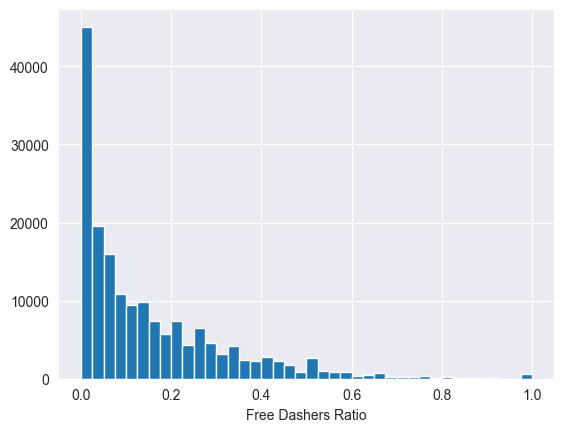

In [96]:
# now let's look at the distribution of the proportion of dashers ratio within 10 miles of the store
deliveries_clean['free_dashers_ratio'].hist(bins=40)
axes_label(x_label="Free Dashers Ratio");

The distribution of free dashers ratio is long tailed peaking early on and trailing off, but a limit on the x-scale might help bring more focus.

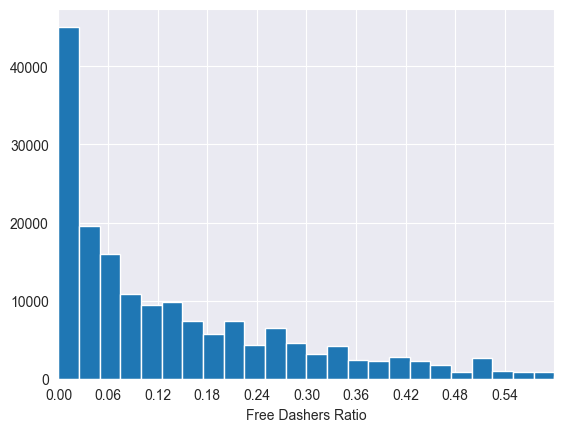

In [97]:
# let's cut out some taile-end values
deliveries_clean['free_dashers_ratio'].hist(bins=40)
axes_label(x_label="Free Dashers Ratio", x_lim=True, lim_val=[0, 0.6], x_ticks=True, tick_val=np.arange(0, 0.6, 0.06));

The frequency of free dashers ratio peaks very early on closer to 0 then falls sharply at around 0.03, then trails off from there.

In [98]:
# lets look at some of the other potential predictors
# starting with the total outstanding orders within 10 miles of each order in the data
deliveries_clean['total_outstanding_orders'].nunique()   # the number of unique values

274

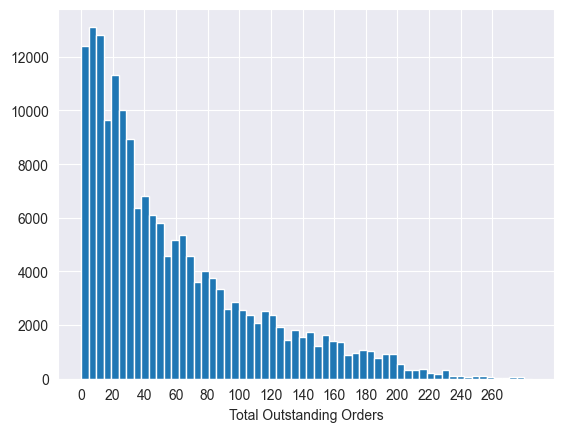

In [99]:
deliveries_clean['total_outstanding_orders'].hist(bins=60)
axes_label(x_label="Total Outstanding Orders")
plt.xticks(np.arange(0, 280, 20));

The frequency of outstanding orders peaks at around 10 orders, then falls, and trails off. However, small spikes can be seen roughly every 20 orders.

In [100]:
# let's look at some other order variables starting with number of items in an order

# let's look at the number of unique values for this column
deliveries_clean['total_items'].nunique()

57

In [101]:
# the frequency of each unique value for the total itmes column
deliveries_clean['total_items'].value_counts()

2      54119
1      39701
3      39025
4      25052
5      14008
6       8591
7       4984
8       3027
9       1823
10      1250
11       799
12       639
13       366
14       299
15       203
16       168
17       122
18       106
19        66
20        53
21        49
22        36
24        34
25        31
26        29
28        18
30        15
27        15
23        15
29        14
34         8
42         7
35         6
33         6
31         5
48         4
40         3
39         3
37         3
36         3
32         3
49         2
50         2
41         2
411        1
38         1
45         1
59         1
51         1
47         1
57         1
44         1
56         1
43         1
84         1
64         1
66         1
Name: total_items, dtype: int64

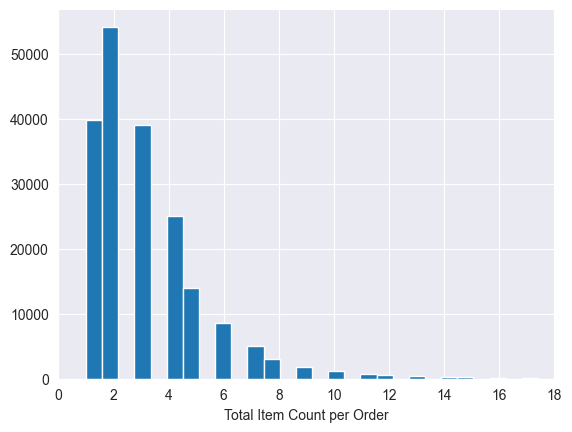

In [102]:
# plotting this frequency on a histogram with modified axis limits and small bin sizes to bette observe the distribution
deliveries_clean['total_items'].hist(bins=700)
axes_label(x_label="Total Item Count per Order", x_lim=True, lim_val=[0, 18]);

Regarding total items per order, the frequency is significantly higher at 1 item, peaks at 2 then falls to slightly less than the initial frequency, the trails off gradually thereafter. I expect quite a similar distribution for the number of distinct items per order. 

In [103]:
# number of unique values for number of distinct items per order
deliveries_clean['num_distinct_items'].nunique()

20

In [104]:
# frequency of unique values for distinct item count per order
deliveries_clean['num_distinct_items'].value_counts()

2     58191
1     48767
3     41639
4     23105
5     11716
6      5650
7      2867
8      1375
9       684
10      354
11      205
12       88
13       39
14       26
15       11
16        4
18        3
20        1
17        1
19        1
Name: num_distinct_items, dtype: int64

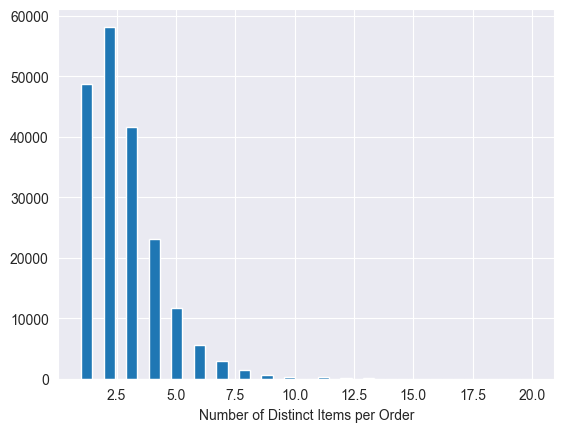

In [105]:
# distribution of the number of distinct items per order
deliveries_clean['num_distinct_items'].hist(bins=40)
plt.xlabel("Number of Distinct Items per Order");

The distribution for number of distinct items per order is concentrated towards the start, peaking at about 2.5 items and trailing off. It is skewed very much to the right.

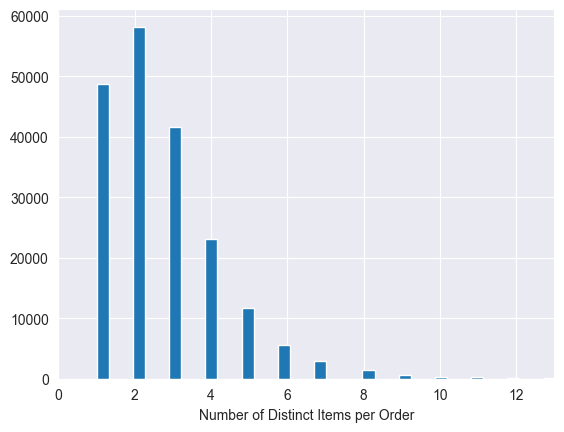

In [106]:
# let's limit the x-axis scale  to better observe the distribution
deliveries_clean['num_distinct_items'].hist(bins=60)
axes_label(x_label="")
plt.xlabel("Number of Distinct Items per Order")
plt.xlim([0, 13]);

The number of distinct items per order exhibits similar distribution to that of total item count per order, as expected, with the frequency being significant at 1 distinct item per order, peaking at 2 dropping at 3 distinct items and trailing off from there.

In [107]:
# number of stores in the data
deliveries_clean['store_id'].nunique()

6735

In [108]:
# let's look at the top performing stores
deliveries_clean['store_id'].value_counts().head(10)

6865    923
1311    850
314     808
1686    754
3937    717
6917    657
6074    624
4367    583
3748    552
6503    542
Name: store_id, dtype: int64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The delivery duration had a large range of values, and after looking at the data using a log transformation, the distribution appeared normal, peaking between 2.2k and 3.1k seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution for the primary feature of interest (delivery duration) without the log transform showed that duration time for orders is mostly concentrated between 0 to 10k seconds with lots of outliers on the right. The duration from order creation to delivery also had a large range of values with most orders having values between 0 to 1.8k seconds, while most orders cost between $0 to $125 with an insignificant number of orders costing more. For safety, all these outlier orders were dropped from the dataset.

## Bivariate Exploration

In [109]:
deliveries_clean.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'delivery_duration',
       'store_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers', 'free_dashers_ratio',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration',
       'estimated_order_to_delivery_duration'],
      dtype='object')

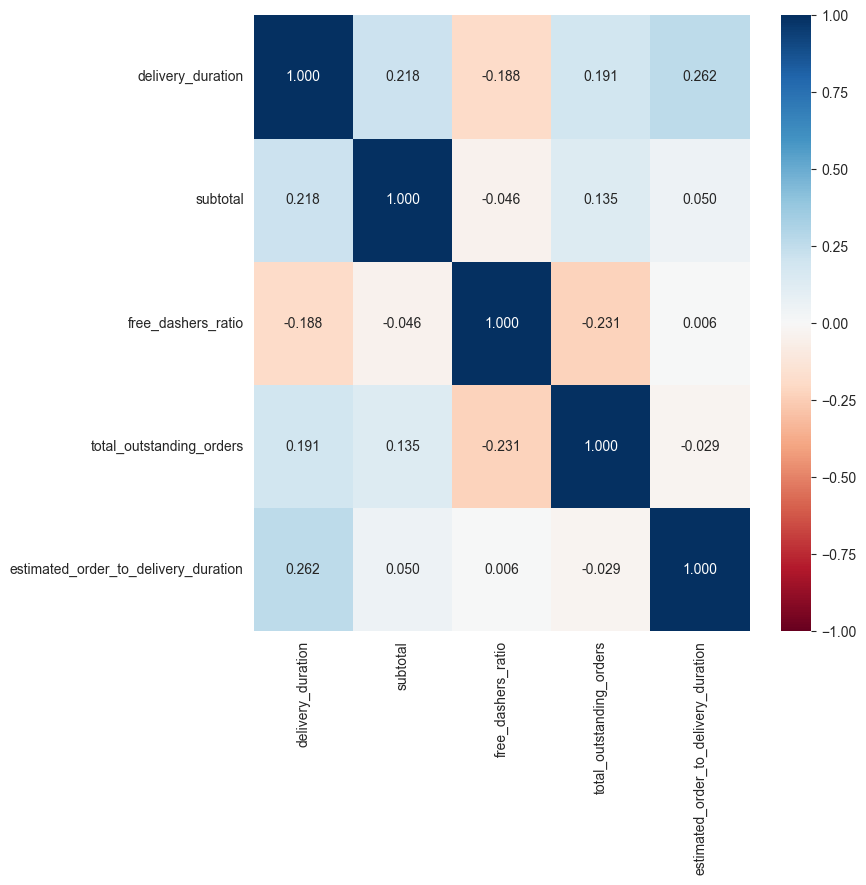

In [110]:
# now we can look at some correlation plots
# starting with the correlation between the primary numerical features
primary_num_cols = ['delivery_duration', 'subtotal', 'free_dashers_ratio', 'total_outstanding_orders', 'estimated_order_to_delivery_duration']

plt.figure(figsize=[8, 8])
sns.heatmap(deliveries_clean[primary_num_cols].corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1, fmt=".3f");

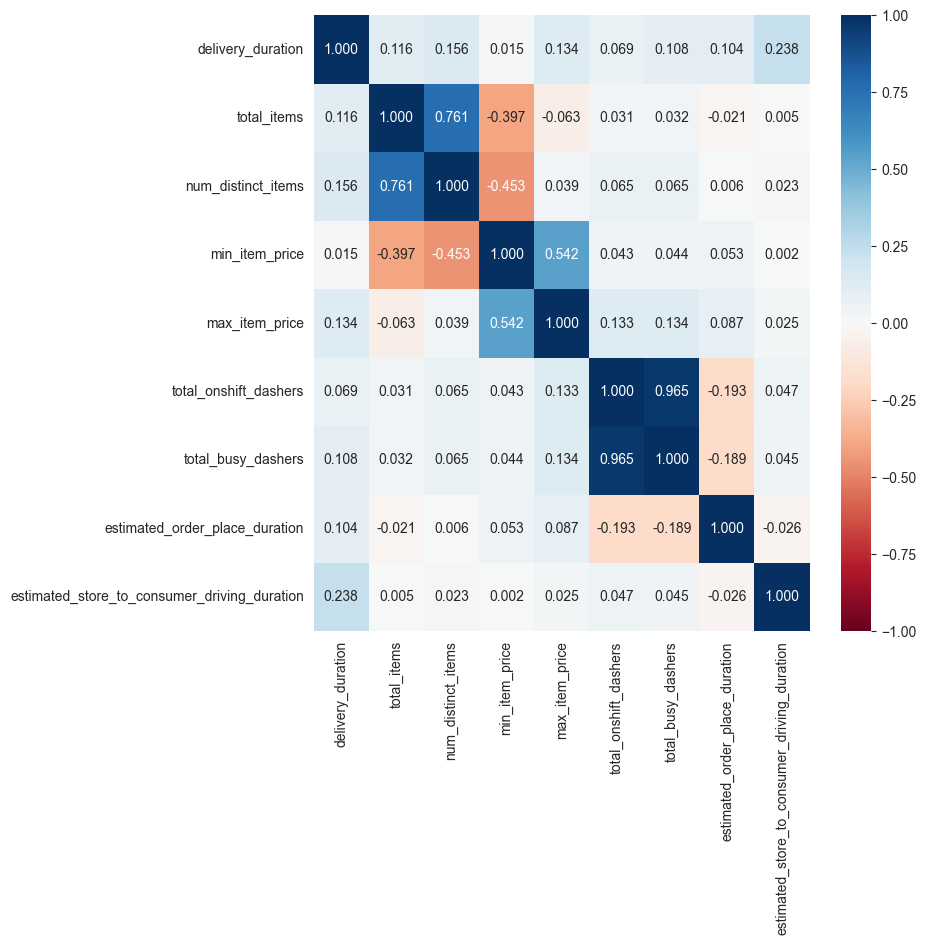

In [111]:
# now we look at the correlation between delivery duration and other numerical features
other_feature_cols = ['delivery_duration', 'total_items', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration']

plt.figure(figsize=[8, 8])
sns.heatmap(deliveries_clean[other_feature_cols].corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1, fmt=".3f");

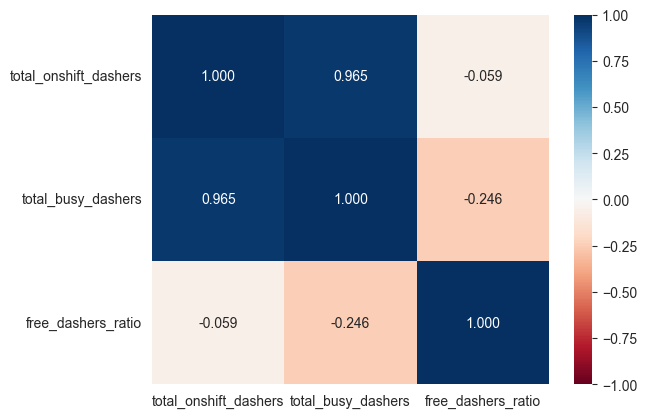

In [112]:
dasher_cols2 = [col for col in deliveries_clean.columns if "dasher" in col]

sns.heatmap(deliveries_clean[dasher_cols2].corr(), annot=True, cmap="RdBu", fmt=".3f", vmin=-1, vmax=1);

Looking at the first two correlation plots, **delivery duration**, as anticipated, has a higher correlation (though weak in all cases, and in decreasing order) with **estimated order creation to delivery duration** (**0.26**), **subtotal** (**0.22**), and **total outstanding orders** within 10 miles of the delivery location (**0.19**) compared to the other numerical features, except the **estimated store to consumer drive duration** (**0.24**). Though it is worth noting that estimated order creation to delivery duration is a feature generated from estimated store to consumer drive duration, so this correlation is to be expected.

As expected, there is a slightly negative correlation between delivery duration and the **ratio of free dashers to onshift dashers** within 10 miles of the store (**-0.19**). This is the only feature that has a negative correlation with delivery duration. This makes sense since the higher the proportion of free dashers compared to that of busy dashers, the more likely orders are to be delivered earlier.

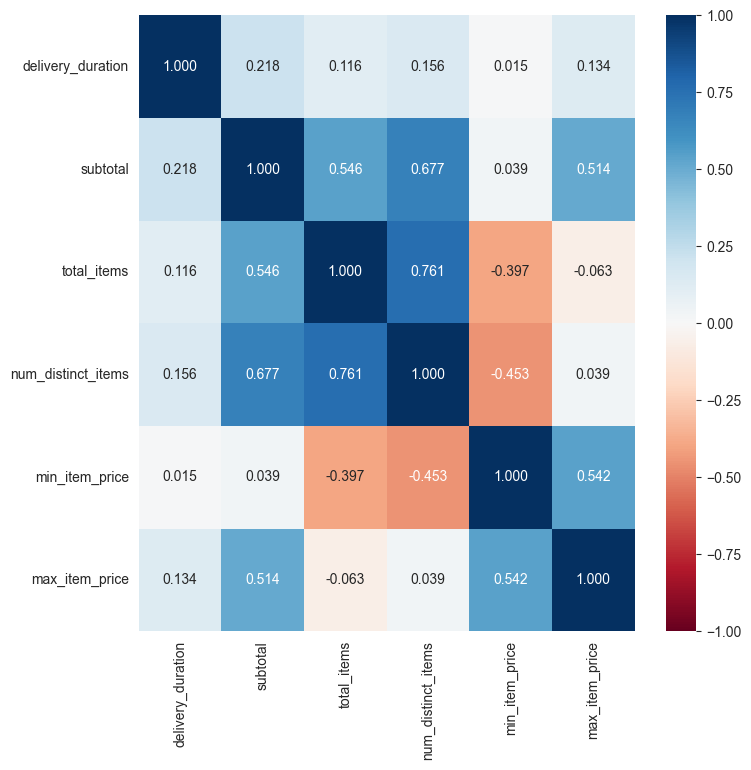

In [113]:
# correlation between delivery duration and order package features
order_feature_cols = ['delivery_duration', 'subtotal', 'total_items', 'num_distinct_items', 'min_item_price', 'max_item_price']

plt.figure(figsize=[8, 8])
sns.heatmap(deliveries_clean[order_feature_cols].corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1, fmt=".3f");

As expected, there's a moderate to strong positive correlation between subtotal,  item count, and distinct item count of an order.

However, there is a moderately negative correlation between price of item with the lowest cost, and the total item count as well as the distinct item count in an order. This makes sense as it is more likely that customers would order numerous cheaper items or fewer more expensive items than numerous relatively expensive items.

c:\Users\Binyoh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\Binyoh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


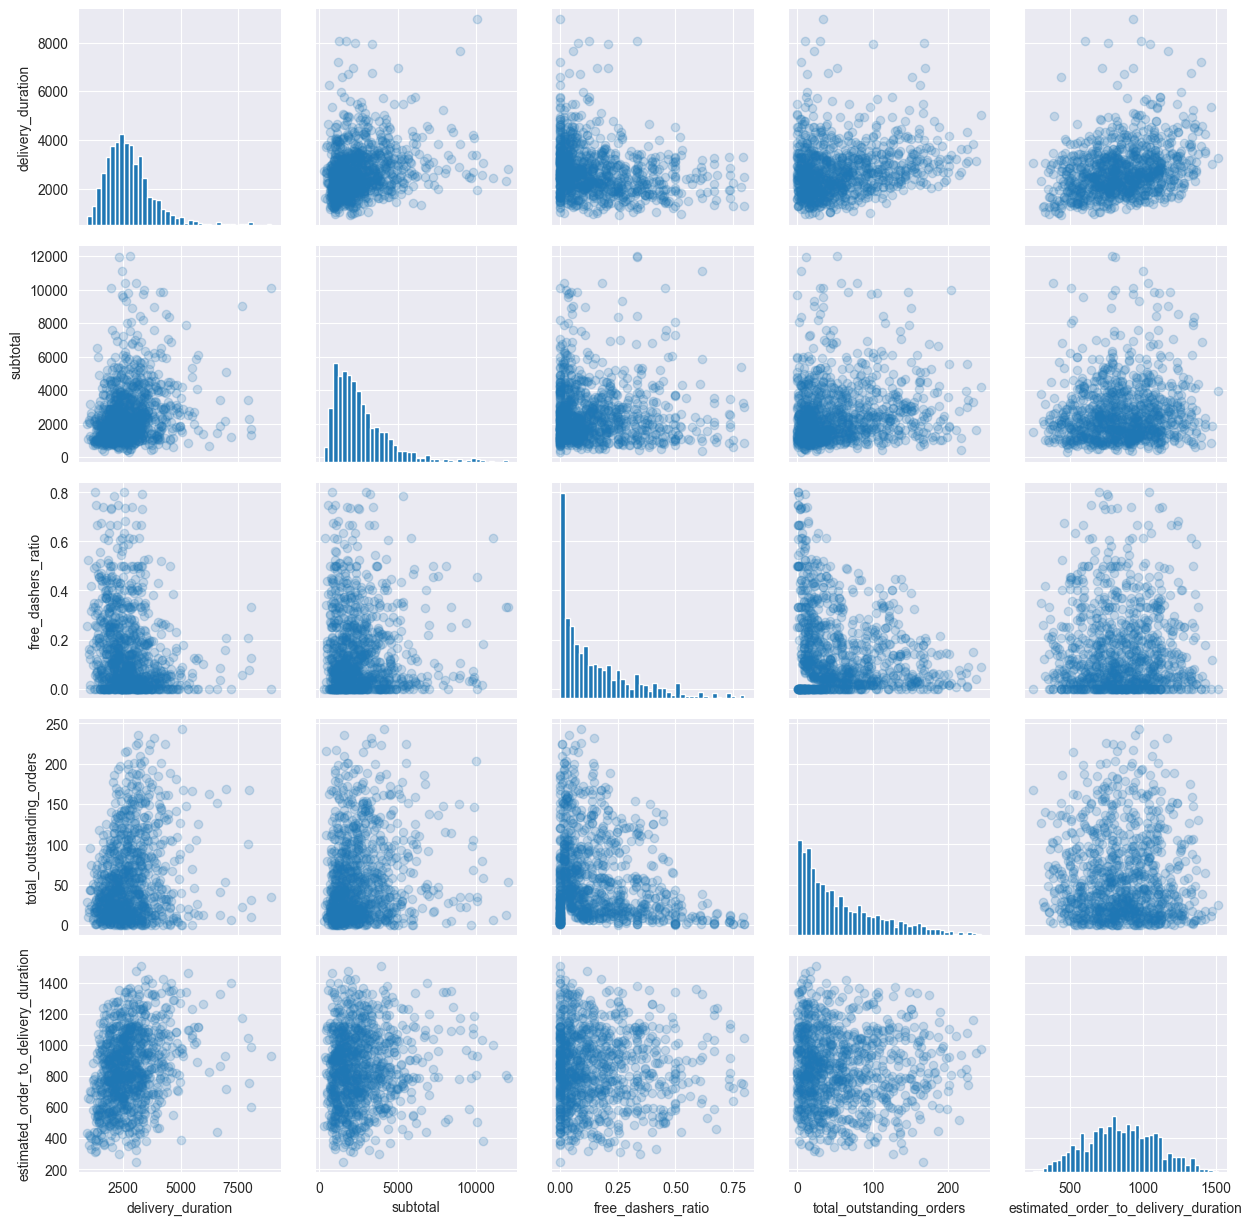

In [114]:
# lets see the relationship between primary numerical features of interest
# to avoid errors, we can drop all orders with missing values in the primary numerical features of interest
# we shall also use 100 samples from the dataset to fairly reflect how the features relate to one another
samples = np.random.choice(deliveries_clean.dropna(subset=primary_num_cols).index, 1000, replace=False)
order_samples = deliveries_clean.loc[samples, :]
p = sns.PairGrid(data=order_samples, vars=primary_num_cols)
p = p.map_diag(plt.hist, bins=40)
p.map_offdiag(plt.scatter, alpha=.2);

This pairplot reinforces the deductions obtained from the heatmaps above that delivery duration has a comparatively higher positive correlation with order subtotal, ration of free dashers to total onshift dashers, total outstanding orders, and the estimated order creation to delivery duration.

The comparatively high positive correlation between delivery duration and total outstanding orders might be a given, since there is likely a higher chance that an area with a larger number of orders/deliveries is quite populated and/or busy increasing the likelihood of being stuck in traffic.

As expected there is a medium to fairly high positive correlation between subtotal, total item count in an order and the number of distinct items in the order.

Interestingly, delivery duration appears to have a somewhat negative logarithmic relationship with the ratios of free dashers to total onshift dashers.

In [115]:
cat_vars = ['market_id', 'store_id', 'store_primary_category', 'order_protocol']

In [116]:
market_df = deliveries_clean.dropna(subset='market_id').astype({'market_id': "string"})

store_df = deliveries_clean.dropna(subset='store_id').astype({'store_id': "string"})

order_prot_df = deliveries_clean.dropna(subset='order_protocol')

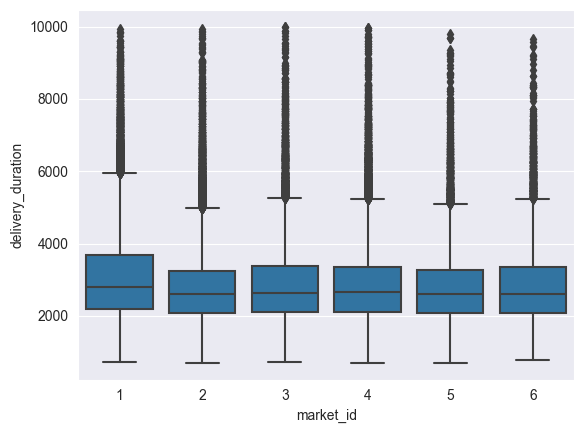

In [117]:
# plotting relationship between delivery duration and market id
sns.boxplot(data=market_df, x='market_id', y='delivery_duration', color=default_color);

Market 1 appears to have higher delivery durations on average compared to the rest, that have fairly equal values.

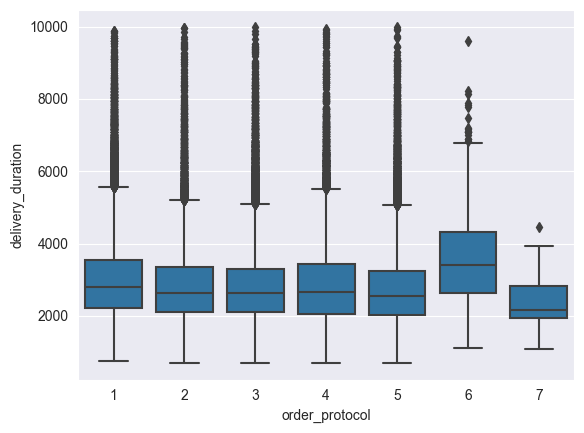

In [118]:
# let's look at the relationship between delivery duration and order protocol
sns.boxplot(data=order_prot_df, x='order_protocol', y='delivery_duration', color=default_color);

Protocol 6 orders tend to have higher duration times compared to the other protocols, though protocol 7 orders appear to have the lowest delivery duration times compared to the others.

It could be helpful to visualize how delivery duration relates to order protocol in each market.

In [119]:
# splitting the data by market id
market_1 = deliveries_clean.query('market_id == 1')
market_2 = deliveries_clean.query('market_id == 2')
market_3 = deliveries_clean.query('market_id == 3')
market_4 = deliveries_clean.query('market_id == 4')
market_5 = deliveries_clean.query('market_id == 5')
market_6 = deliveries_clean.query('market_id == 6')

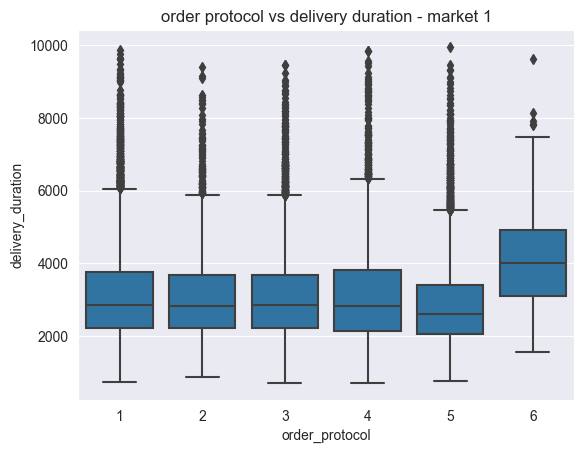

In [120]:
# let's see how delivery duration relates to order protocol in each market
# starting with market 1
sns.boxplot(data=market_1.dropna(subset='order_protocol'), x='order_protocol', y='delivery_duration', color=default_color)
plt.title("order protocol vs delivery duration - market 1");

In market 1, protocol 6 orders appear to have the highest delivery duration values, The other protocols have failry similar delivery duration values, though protocol 5 appears to be the lowest.

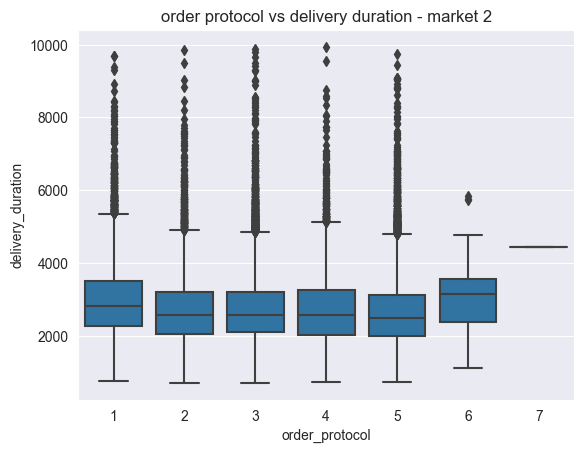

In [121]:
# let's look at market 2
sns.boxplot(data=market_2.dropna(subset='order_protocol'), x='order_protocol', y='delivery_duration', color=default_color)
plt.title("order protocol vs delivery duration - market 2");

As for market 2, beside the single protocol 7 order, protocol 6 orders once more tend to have higher delivery duration values, followed by protocol 1 orders. The rest have fairly similar delivery duration values, though, protocol 5 once again appears to have the lowest values.

In [122]:
# number of orders per protocol in market 2
market_2['order_protocol'].value_counts()

3    16504
5    15468
1    11120
2     7204
4     3808
6      125
7        1
Name: order_protocol, dtype: Int64

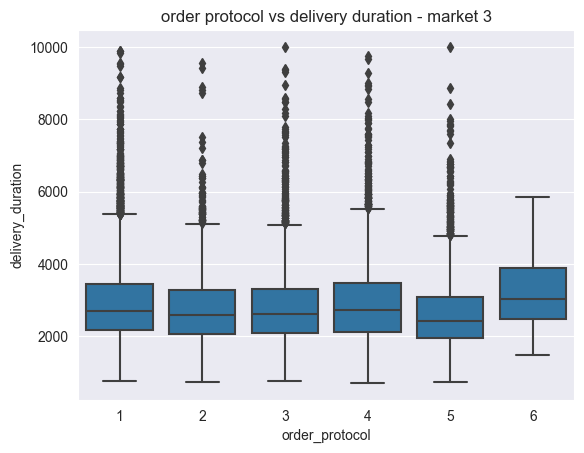

In [123]:
# starting with market 3
sns.boxplot(data=market_3.dropna(subset='order_protocol'), x='order_protocol', y='delivery_duration', color=default_color)
plt.title("order protocol vs delivery duration - market 3");

In market 3, protocol 6 orders yet again appear to have the highest duration values, followed by protocols 1 and 4 that have similar values, then protocols 2 and 3, with ptotocol 5 orders once more having the lowest delivery duration values.

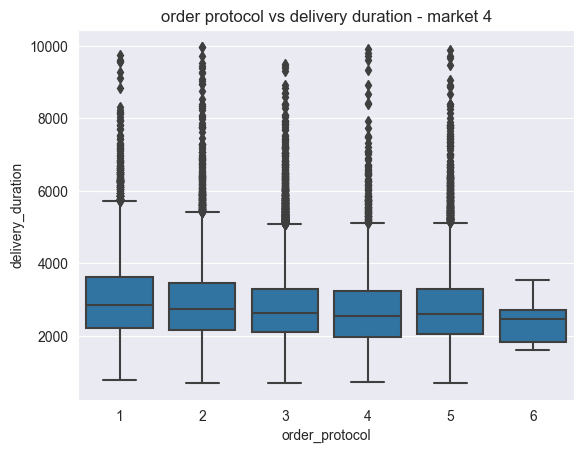

In [124]:
# starting with market 4
sns.boxplot(data=market_4.dropna(subset='order_protocol'), x='order_protocol', y='delivery_duration', color=default_color)
plt.title("order protocol vs delivery duration - market 4");

In market 4 surprisingly, protocol 6 orders instead appear to have the lowest delivery duration values, though it is worth noting that there are significantly fewer protocol 6 orders compared to the others; only 11 of them out of over 46k orders in this market.

Protocol 1 orders have the highest delivery duration values, followed by protocol 2, with the rest having fairly similar values.

In [125]:
market_4['order_protocol'].value_counts()

3    17314
5    12248
1     7312
2     6937
4     3023
6       11
Name: order_protocol, dtype: Int64

In [126]:
market_4.shape[0]

46971

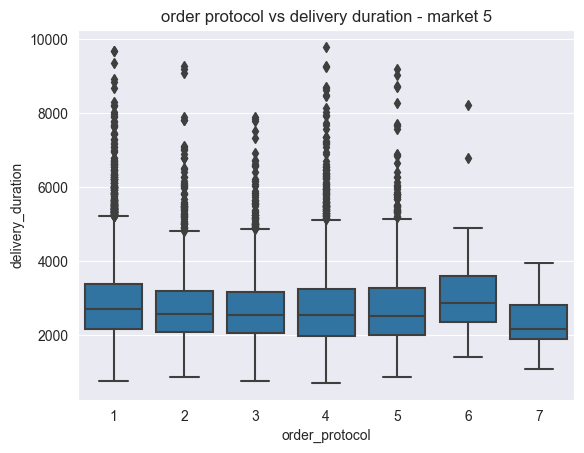

In [127]:
# starting with market 5
sns.boxplot(data=market_5.dropna(subset='order_protocol'), x='order_protocol', y='delivery_duration', color=default_color)
plt.title("order protocol vs delivery duration - market 5");

In market 5, protocol 6 orders like most of the previous markets, have comparatively higher delivery duration values, followed unsurprisingly by protocol 1, this time, protocol 7 orders have the lowest delivery duration values. Although, there are significantly fewer protocol 7 orders compared to the others.

Protocols 2 through 5 have fairly similar delivery duration values. This is the only market besides market 2, that has any protocol 7 orders.

In [128]:
# total number of protocol 7 orders in the data
deliveries_clean.query('order_protocol == 7').shape[0]

18

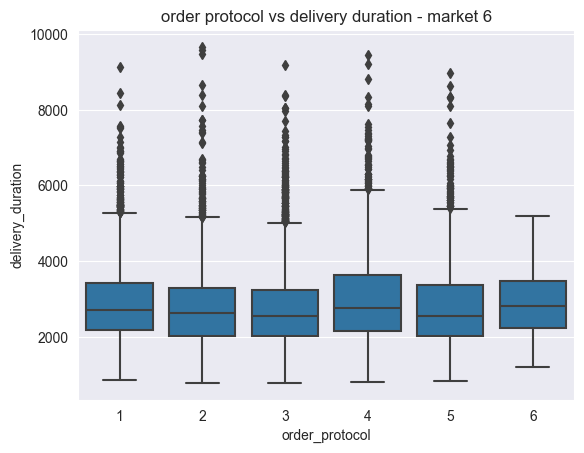

In [129]:
# starting with market 6
sns.boxplot(data=market_6.dropna(subset='order_protocol'), x='order_protocol', y='delivery_duration', color=default_color)
plt.title("order protocol vs delivery duration - market 6");

In most cases, protocol 6 orders tend to have the highest delivery duration times, as is the case with markets 1, 3, 5, and 6.

However, in market 4, protocol 6 orders tend to have the lowest delivery duration, though not by much, with protocol 1 orders having the highest delivery duration time.

While market 2 has protocol 7 with the largest delivery duration time, there's only one such order and so cannot really serve as baseline towards such a conclusion. Unsurprisingly, apart from this sole protocol 7 order, protocol 6 orders have the highest delivery duration time, followed by protocol 1 orders.

There are significantly fewer protocol 7 orders (18 total) compared to the others, all but 1 such orders existing only in market 5.

We shall then see if store performance, either by number of orders received/delivered or order subtotal, affects delivery duration.

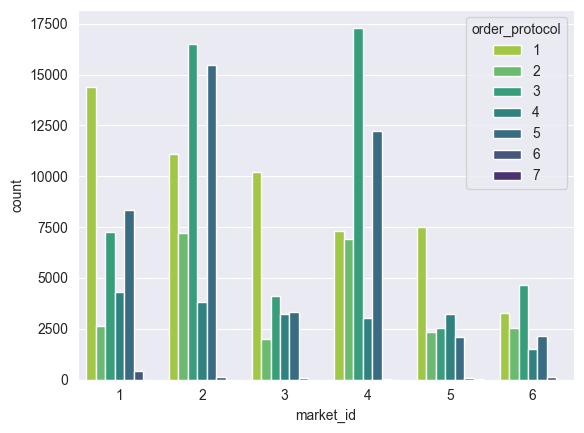

In [130]:
# let's get an idea of the distribution of order protocols per market 
sns.countplot(data=deliveries_clean.dropna(subset=['market_id', 'order_protocol']), x='market_id', hue='order_protocol', palette="viridis_r");

Protocol 1 orders make up the highest proportion of of orders in markets 1, 3, and 5. That changes with markets 2, 4, and 6, having protocol 3 orders making up the highest proportion of all orders therein.  

In [131]:
# let's look at the top performing stores
# first the top 1k stores by order count
top_stores_orders = deliveries_clean['store_id'].value_counts().head(1000)
top_stores_orders

6865    923
1311    850
314     808
1686    754
3937    717
       ... 
3029     51
3967     51
6147     51
1893     51
423      51
Name: store_id, Length: 1000, dtype: int64

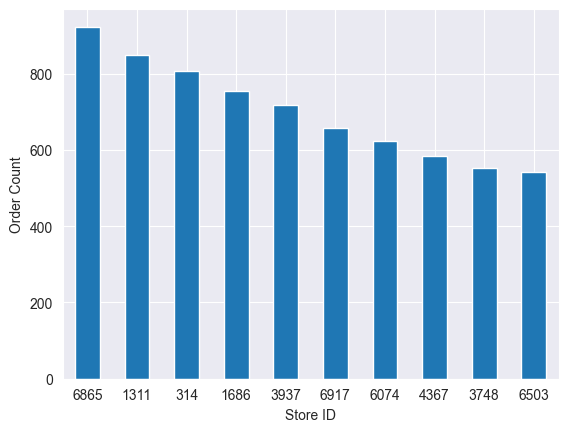

In [132]:
# top 10 performing stores by number of orders
top_stores_orders.head(10).plot(kind="bar", x=top_stores_orders.index, y=top_stores_orders)
axes_label(x_label="Store ID", y_label="Order Count");

Store 6865 receives the highest number of orders, followed in decreasing order by stores 1311, 314, 1686, and 3937.

In [133]:
# top 1k stores by order cost
top_stores_subtotal = deliveries_clean.groupby('store_id')['subtotal'].sum().div(100).sort_values(ascending=False).head(1000)
top_stores_subtotal

store_id
6074    26058.28
2056    19698.48
3937    19408.52
4428    18378.82
3748    18069.84
          ...   
1981     1347.00
511      1346.22
1904     1345.02
2179     1343.89
6763     1341.65
Name: subtotal, Length: 1000, dtype: float64

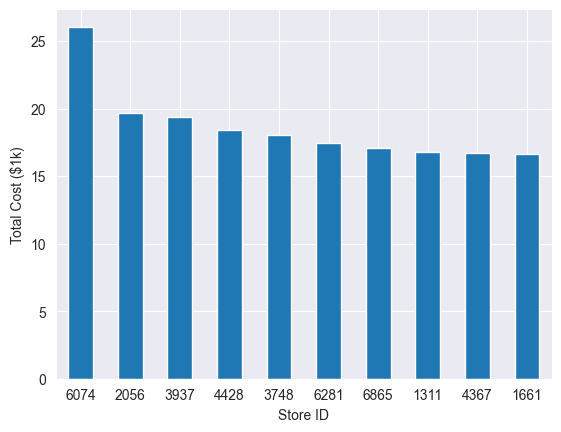

In [134]:
# top 10 stores by order cost
top_stores_subtotal.head(10).div(1000).plot(kind="bar", x=top_stores_subtotal.index, y=top_stores_subtotal)
axes_label(x_label="Store ID", y_label="Total Cost ($1k)");

Surprisingly, store 6074 provides the highest revenue within the time period in the data, and by quite a large margin, despite receiving the 7th most orders among the stores. In decreasing order, stores 2056 (not even in the top 10 for total orders received), 3937 (5th highest orders received), 4428 (also not in the top 10 for orders received), and 3748 (9th for total orders received) contribute the 2nd, 3rd, 4th and 5th respectively in terms of total order revenue.

All the top 5 stores by total order revenue save 1 do not even appear in the top 5 by total orders received. The top 10 stores by total order revenue might receive comparatively a lower number orders, but each order likely costs more on average.

In [135]:
top_stores_orders_list = top_stores_orders.index.tolist()

top_stores_subtotal_list = top_stores_subtotal.index.tolist()

In [136]:
top_stores_orders_df = deliveries_clean.query(f'store_id in {top_stores_orders_list}')

top_stores_subtotal_df = deliveries_clean.query(f'store_id in {top_stores_subtotal_list}')

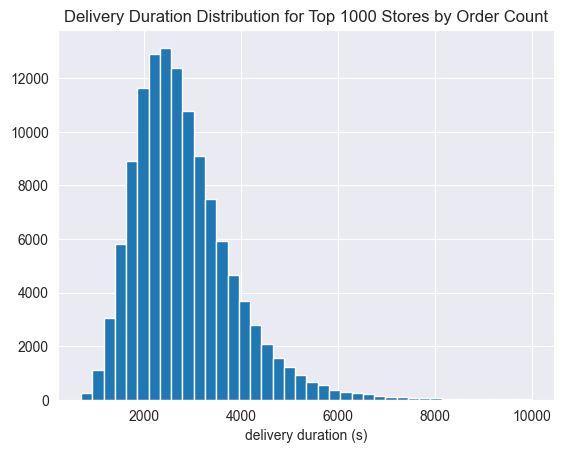

In [137]:
top_stores_orders_df['delivery_duration'].hist(bins=40)
plt.title("Delivery Duration Distribution for Top 1000 Stores by Order Count")
axes_label(x_label="delivery duration (s)");

The top 1000 stores by order count, have a right skewed delivery duration distribution curve that peaks somewhere between 2k to 3k seconds then trailes off.

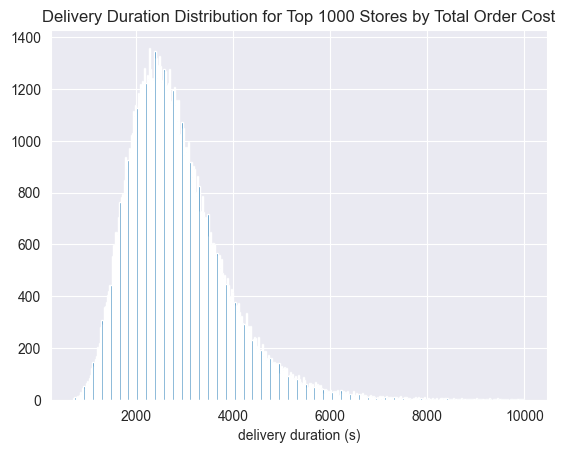

In [138]:
top_stores_subtotal_df['delivery_duration'].hist(bins=400)
plt.title("Delivery Duration Distribution for Top 1000 Stores by Total Order Cost")
axes_label(x_label="delivery duration (s)");

Similarly, the top 1k stores by total order cost have a right skewed delivery duration distribution curve that peaks somehwere between 2k and 3k seconds then trails off.

In [139]:
# let's look at the bottom performing stores
# first the bottom 1k stores by order count
bottom_stores_orders = deliveries_clean['store_id'].value_counts().sort_values(ascending=False).tail(1000)
bottom_stores_orders

1573    2
3639    2
2878    2
434     2
6632    2
       ..
3694    1
887     1
2087    1
5637    1
1845    1
Name: store_id, Length: 1000, dtype: int64

In [140]:
# we now create a dataframe for the bottom 1k performing stores by order count
bottom_stores_orders_list = bottom_stores_orders.index.tolist()

bottom_stores_orders_df= deliveries_clean.query(f'store_id in {bottom_stores_orders_list}')

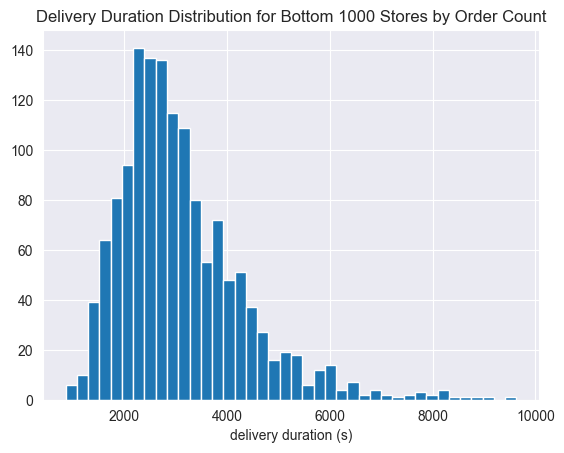

In [141]:
# let's look at the delivery duration distribution for the bottom 1k performing stores by order count
bottom_stores_orders_df['delivery_duration'].hist(bins=40)
plt.title("Delivery Duration Distribution for Bottom 1000 Stores by Order Count")
axes_label(x_label="delivery duration (s)");

The bottom 1000 stores by order count, have a somewhat similar right skewed delivery duration distribution curve that also peaks somewhere between 2k and 3k seconds, with occasional spikes as it trails off

In [142]:
# bottom 1k stores by order cost
bottom_stores_subtotal = deliveries_clean.groupby('store_id')['subtotal'].sum().div(100).sort_values(ascending=False).tail(1000)
bottom_stores_subtotal

store_id
6730    50.00
5434    50.00
6274    50.00
5395    50.00
958     49.93
        ...  
3477     4.05
5417     3.88
1062     3.39
657      3.00
3796     2.30
Name: subtotal, Length: 1000, dtype: float64

In [143]:
# we can create a dataframe for the bottom 1k performing stores by order subtotal
bottom_stores_subtotal_list = bottom_stores_subtotal.index.tolist()

bottom_stores_subtotal_df= deliveries_clean.query(f'store_id in {bottom_stores_subtotal_list}')

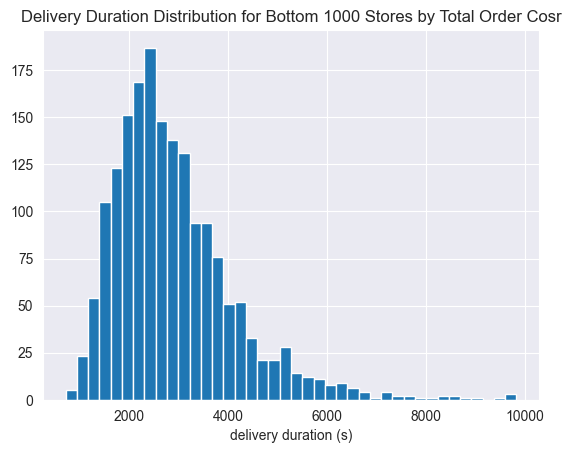

In [144]:
# let's look at the delivery duration distribution for the bottom 1k performing stores by order subtotal
bottom_stores_subtotal_df['delivery_duration'].hist(bins=40)
axes_label(x_label="delivery duration")
plt.title("Delivery Duration Distribution for Bottom 1000 Stores by Total Order Cosr")
axes_label(x_label="delivery duration (s)");

Yet again, the delivery duration distribution curve for the bottom 100 stores by total order cost is right skewed, peaking somewhere between 2k and 3k seconds the trailing off.

Considering how similar the delivery duration distribuions are regardless if the stores are in the top 1000 or bottom 1000 by performance for order count or total order cost, it is unlikely that store performance (both in terms of orders served/received and total order cost) affects delivery duration.

In [145]:
# let's look at how much protocol and market contribute in terms of orders and order cost 
# order count per protocol
protocol_orders = deliveries_clean['order_protocol'].value_counts()
protocol_orders

1    53911
3    52512
5    43732
2    23698
4    19099
6      779
7       18
Name: order_protocol, dtype: Int64

In [146]:
protocol_subtotal = deliveries_clean.groupby('order_protocol')['subtotal'].sum().div(100).div(1000)
protocol_subtotal

order_protocol
1    1508.55328
2     630.45790
3    1504.39177
4     343.26973
5    1177.40706
6      16.52775
7       0.55990
Name: subtotal, dtype: float64

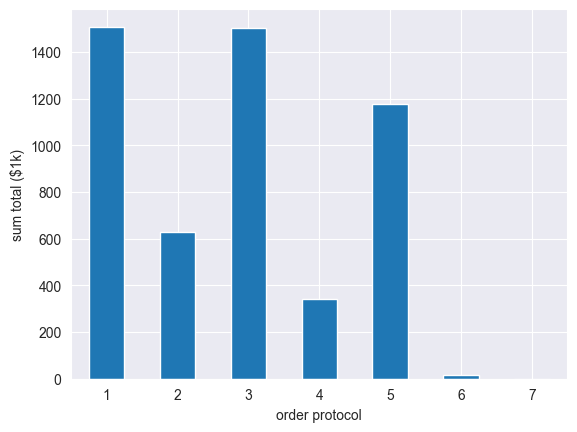

In [147]:
# protocol order performance in terms of subtotal sum
protocol_subtotal.plot(kind="bar", x=protocol_subtotal.index, y=protocol_subtotal)
axes_label(x_label="order protocol", y_label="sum total ($1k)");

Protocols 1 and 3 orders contribute the most in terms of total order cost, with similar total cost values, followed by protocol 5, with protocols 6 and 7 in decreasing order, unsurprisingly contributing the least.

In [148]:
mean_protocol_subtotal = deliveries_clean.groupby('order_protocol')['subtotal'].mean().div(100)
mean_protocol_subtotal

order_protocol
1    27.982291
2    26.603844
3    28.648533
4    17.973178
5    26.923238
6    21.216624
7    31.105556
Name: subtotal, dtype: float64

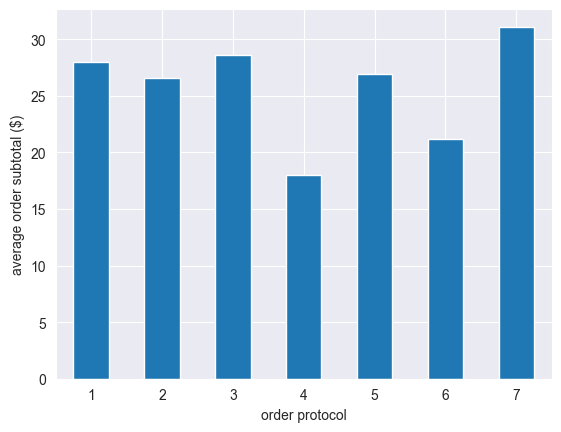

In [149]:
# protocol order performance in terms of average subtotal
mean_protocol_subtotal.plot(kind="bar", x=mean_protocol_subtotal.index, y=mean_protocol_subtotal)
axes_label(x_label="order protocol", y_label="average order subtotal ($)");

On average though, protocol 7 orders appear to cost more, followed by protocol 3 orders, while protocol 4 orders tend to cost the least on average.

In [150]:
deliveries_clean['market_id'].value_counts()

2    54376
4    46971
1    37434
3    22973
5    17767
6    14236
Name: market_id, dtype: Int64

In [151]:
market_subtotal = deliveries_clean.groupby('market_id')['subtotal'].sum().div(100).div(1000)
market_subtotal

market_id
1    1021.81744
2    1428.29419
3     591.51996
4    1354.31563
5     429.75463
6     355.65519
Name: subtotal, dtype: float64

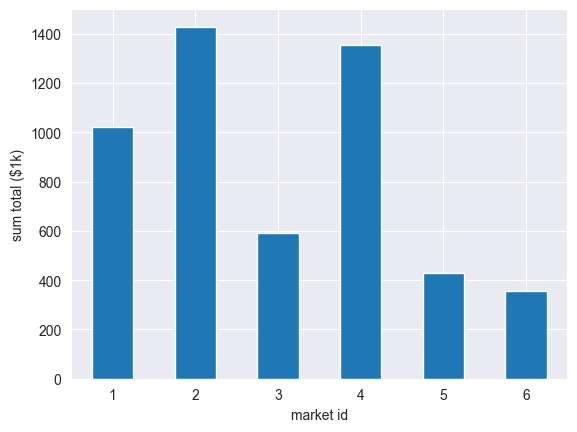

In [152]:
# market performance in terms of subtotal sum
market_subtotal.plot(kind="bar", x=market_subtotal.index, y=market_subtotal)
axes_label(x_label="market id", y_label="sum total ($1k)");

Market 3 contributes the most in terms of total order revenue, followed by market 4, while markets 5 and 6 in decreasing order contributing the least.

In [153]:
mean_market_subtotal = deliveries_clean.groupby('market_id')['subtotal'].mean().div(100)
mean_market_subtotal

market_id
1    27.296507
2    26.266996
3    25.748486
4    28.833017
5    24.188362
6    24.982803
Name: subtotal, dtype: float64

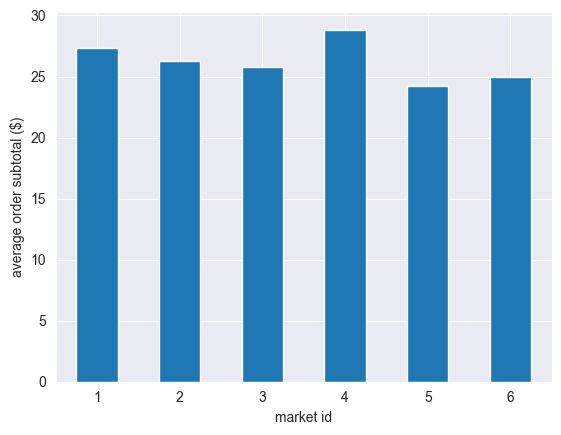

In [154]:
# average subtotal per market
mean_market_subtotal.plot(kind="bar", x=mean_market_subtotal.index, y=mean_market_subtotal)
axes_label(x_label="market id", y_label="average order subtotal ($)");

The average cost of orders in market 4 though are the highest comparatively, followed by market 1, while market 5 orders tend to cost the least on average.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> **Delivery duration**, has a higher correlation (though weak in all cases) with **estimated order creation to delivery duration** (**0.26**), **subtotal** (**0.22**), and **total outstanding orders** within 10 miles of the delivery location (**0.19**), when compared to the other numerical features, except for **estimated store to consumer drive duration** (**0.24**) (note that estimated order creation to delivery duration is a feature generated from estimated store to consumer drive duration, so this correlation is to be expected).

> Meanwhile, there is a slightly negative correlation between delivery duration and the **ratio of free dashers to onshift dashers** within 10 miles of the store (**-0.19**) (the only feature that correlates negatively with delivery duration, which was expected).

> There is a medium to fairly high positive correlation between subtotal, total item count in an order and the number of distinct items in the order.

> Market 1 appears to have slightly higher delivery duration values compared to the other 5 that have fairly similar values.

> Protocol 6 orders tend to have higher duration times compared to the other protocols, though protocol 7 orders appear to have the lowest delivery duration times compared to the others.

> In most cases, protocol 6 orders tend to have the highest delivery duration times, as is the case with markets 1, 3, 5, and 6.

> In market 4, protocol 6 orders tend to have the lowest delivery duration, though not by much, with protocol 1 orders having the highest delivery duration time.

>  In market 2, protocol 6 orders (save one protocol 7 order) have the highest delivery duration time, followed by protocol 1 orders.

> The distribution of delivery duration is quite similar regardless if we look at the top 1k performing stores or bottom 1k performing stores based on order subtotal, or order count, indicating it is unlikely that store performance (both in terms of orders served/received and order cost) affects delivery duration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Market 2 has the highest number of orders and also contributes the most in terms of sum total cost, but is third for average order cost. Meanwhile market 4 is second in terms of total order count and sum total cost, but has the highest average cost per order. Protocol 7 orders on average cost the most, though they contribute the least in terms of total cost and order count. Protocols 1 and 3 are quite close in terms of order count, order sum total and average order cost, contributing the most in each regard bar average order cost.

> There is a moderate negative correlation between the distinct number of items in an order and the price of the item with the least cost in that order. There exists though, a very strong positive correlation between total onshift dashers and total busy dashers, meaning there might be a high likelihood of onshift dashers within 10 miles of the store working on at order at the time of creation of another order.

## Multivariate Exploration

In this section of tha analysis, I primarily want to figure out how the availability of dashers for orders affects the relationship between delivery duration and market, order protocol, estimated order creation to delivery duration, and order subtotal.

In [155]:
# first to avoid errors, we'll drop all orders with missing values in any of the column
multivariate_df = deliveries_clean.dropna(axis=0)

In [156]:
# now let's engineer another column indicating if there are any free dashers within 10 miles of the store
multivariate_df['free_dashers_available'] = (multivariate_df['total_onshift_dashers'] - multivariate_df['total_busy_dashers']).apply(lambda x: "yes" if (x != 0) else "no")

C:\Users\Binyoh\AppData\Local\Temp\ipykernel_2144\2879166477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multivariate_df['free_dashers_available'] = (multivariate_df['total_onshift_dashers'] - multivariate_df['total_busy_dashers']).apply(lambda x: "yes" if (x != 0) else "no")


In [157]:
# making sure all the operations have been performed successfully
multivariate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173401 entries, 0 to 197427
Data columns (total 20 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     173401 non-null  Int64         
 1   created_at                                    173401 non-null  datetime64[ns]
 2   actual_delivery_time                          173401 non-null  datetime64[ns]
 3   delivery_duration                             173401 non-null  int64         
 4   store_id                                      173401 non-null  int64         
 5   store_primary_category                        173401 non-null  object        
 6   order_protocol                                173401 non-null  Int64         
 7   total_items                                   173401 non-null  int64         
 8   subtotal                                      173401 n

In [158]:
# store the datset as csv
multivariate_df.to_csv("./export/doordash-deliveries-clean-v3.csv", index_label=False)

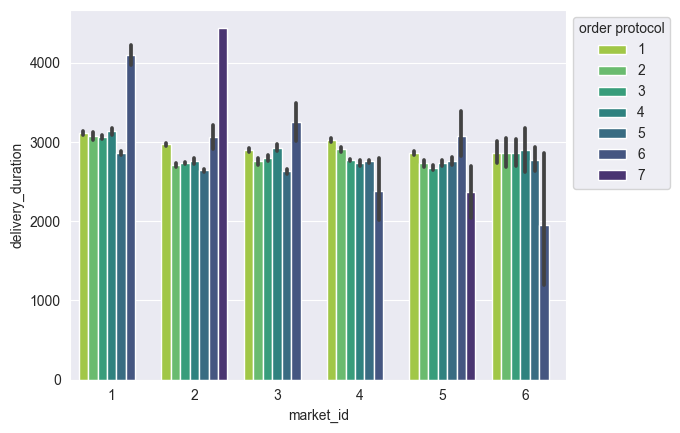

In [159]:
# average delivery duration per order protocol grouped by market
sns.barplot(data=multivariate_df, x='market_id', y='delivery_duration', hue='order_protocol', palette="viridis_r")
legend_label(leg_title="order protocol", anchor=[1, 1]);

This simply reaffirms what we discovered earlier; that in most markets, protocol 6 orders generally have higher delivery duration.

In [160]:
# numerical representation of the information above
multivariate_df.groupby(['market_id', 'free_dashers_available'])['delivery_duration'].mean()

market_id  free_dashers_available
1          no                        3283.978167
           yes                       2919.249575
2          no                        2803.482302
           yes                       2748.157890
3          no                        3114.920162
           yes                       2682.311379
4          no                        3064.363318
           yes                       2794.381506
5          no                        3067.499332
           yes                       2740.504831
6          no                        3022.261194
           yes                       2791.792339
Name: delivery_duration, dtype: float64

In [161]:
# number of orders per market
multivariate_df['market_id'].value_counts()

2    52810
4    45607
1    36527
3    20781
5    17046
6      630
Name: market_id, dtype: Int64

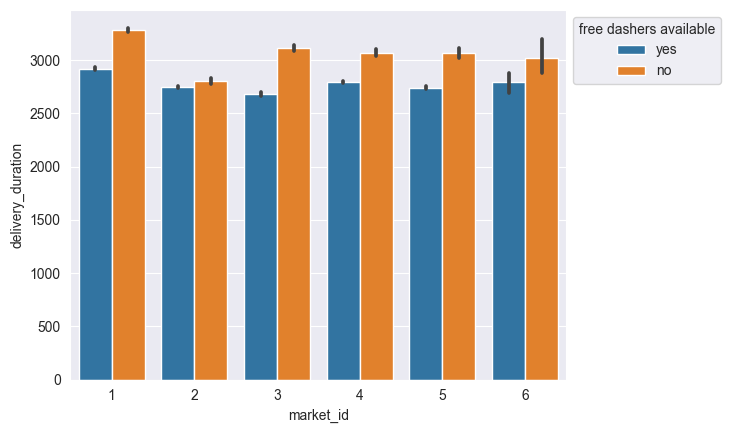

In [162]:
# now we look at how the availability of free dashers might affect delivery duration in each market
sns.barplot(data=multivariate_df, x='market_id', y='delivery_duration', hue='free_dashers_available')
legend_label(leg_title="free dashers available", anchor=[1,1]);

Regardless of the market, delivery duration on average tends to be higher when no free dahsers are available, moreso the case with market 1. Market 6 though displays a higher variance in delivery duration compared to the others. This is likely because there are significanly fewer orders received in market 6 compared to the others.

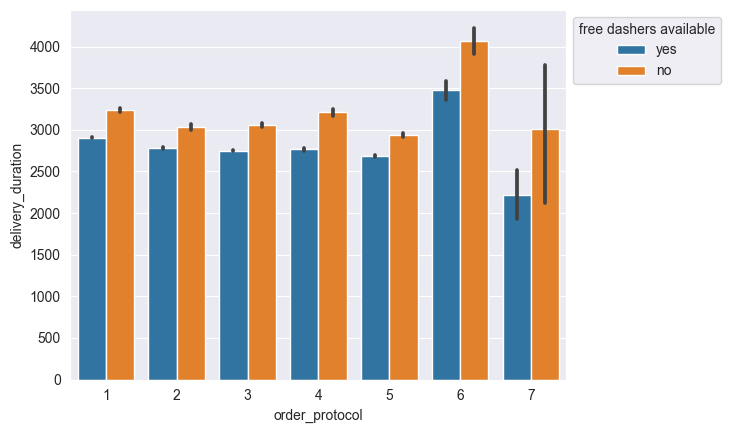

In [163]:
# similarly we can find out how free dashers availability affects the delivery duration for each order protocol
sns.barplot(data=multivariate_df, x='order_protocol', y='delivery_duration', hue='free_dashers_available')
legend_label(leg_title="free dashers available", anchor=[1, 1]);

Similarly, irrespective of order protocol, delivery duration is higher on average when free dashers aren't available, more so the case with protocols 6 and 7 orders. There is a significantly higher variance for delivery duration for protocol 7 orders, likely due to the significantly lower order count whe compared to other protocols.

These plots indicate that delivery duration on average is higher when free dashers aren't available within 10 miles of the store, regardless of market and order protocol.

In [164]:
# percentage frequency of free dashers availability in each market
multivariate_df.groupby('market_id')['free_dashers_available'].value_counts(normalize=True).mul(100)

market_id  free_dashers_available
1          yes                       61.253319
           no                        38.746681
2          yes                       88.712365
           no                        11.287635
3          yes                       65.463645
           no                        34.536355
4          yes                       89.348126
           no                        10.651874
5          yes                       86.818022
           no                        13.181978
6          yes                       78.730159
           no                        21.269841
Name: free_dashers_available, dtype: float64

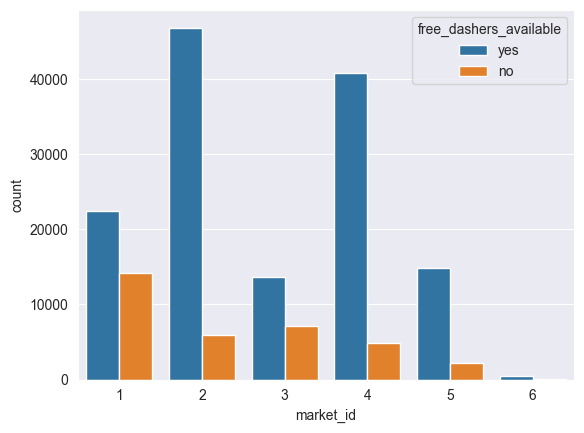

In [165]:
# frequency of free dashers availability in each market
sns.countplot(data=multivariate_df, x='market_id', hue='free_dashers_available');

Nearly 40% of orders in market 1 don't have free dashers available, which likely contributes to the higher average delivery duration comparatively. In market 3, just under 35% of orders don't have free dashers available, which could perhaps explain why it has the second highest delivery duration on average.

In [166]:
# proportion of free dashers availability for each order protocol
multivariate_df.groupby('order_protocol')['free_dashers_available'].value_counts(normalize=True).mul(100)

order_protocol  free_dashers_available
1               yes                       75.163577
                no                        24.836423
2               yes                       81.733385
                no                        18.266615
3               yes                       82.891173
                no                        17.108827
4               yes                       76.465750
                no                        23.534250
5               yes                       83.624588
                no                        16.375412
6               yes                       61.295181
                no                        38.704819
7               yes                       66.666667
                no                        33.333333
Name: free_dashers_available, dtype: float64

In [167]:
multivariate_df.groupby('order_protocol')['delivery_duration'].mean().sort_values(ascending=False)

order_protocol
6    3705.106928
1    2990.606409
4    2871.617495
2    2828.584143
3    2803.992196
5    2724.069559
7    2484.111111
Name: delivery_duration, dtype: float64

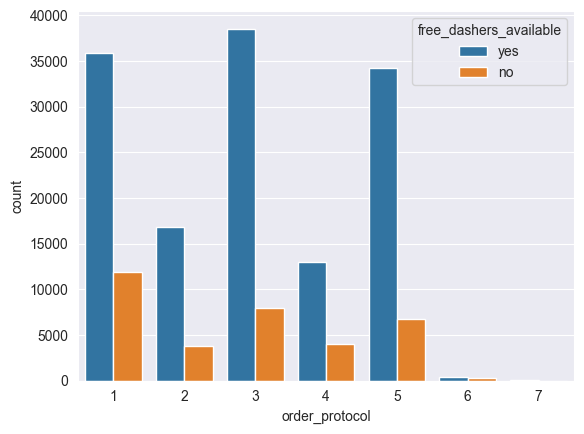

In [168]:
# frequency of free dashers availability per order protocol
sns.countplot(data=multivariate_df, x='order_protocol', hue='free_dashers_available');

Nearly 40% of protocol 6 orders lack free dashers for delivery, the most of all protocols. While the number of protocol 6 orders is much lower compared to all other protocols bar protocol 7, it is not encouraging for customers who prefer to use protocol 6 for their orders since the delivery is likely to take longer.

For protocol 7, about a third (33%) of the 18 orders do not have free dashers available for delivery. While this is likely a newly introduced order protocol, it is not an encouraging start and may deter customers who'd want to or like to place orders using this protocol.

Protocol 5 appears to frequently have the largest proportion of order with free dashers available, which could explain why it is the lowest bar protocol 7 in terms of average delivery duration.

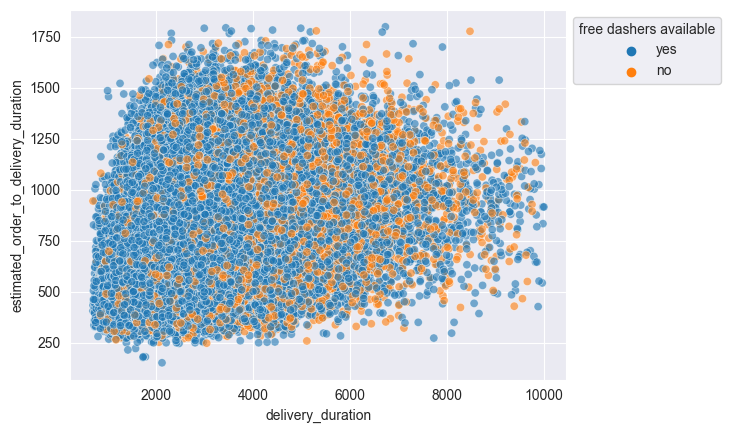

In [169]:
sns.scatterplot(data=multivariate_df, x='delivery_duration', y='estimated_order_to_delivery_duration', hue='free_dashers_available', alpha=0.6)
legend_label(leg_title="free dashers available", anchor=[1, 1]);

As expected, orders without free dashers available often have high delivery duration , and similarly higher estimated order creation to delivery duration. Perhaps, the longer it takes between a store receiving an order from DoorDash, and drive to the customer, most dashers would likely be working on another order.

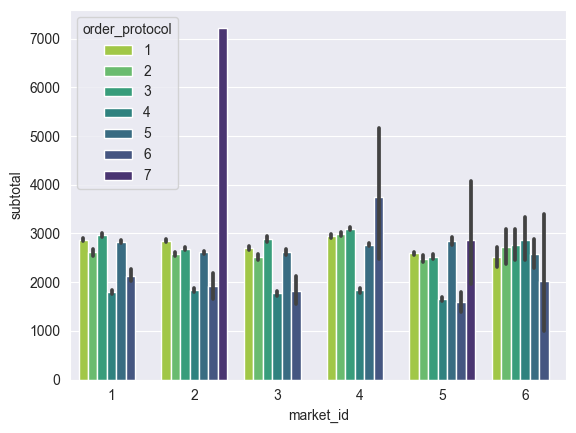

In [170]:
# let's have a quick look at the average order cost per protocol in each market
sns.barplot(data=multivariate_df, x='market_id', y='subtotal', hue='order_protocol', palette="viridis_r");

This plot indicates there's a large variance in order subtotal cost for protocol 6 orders in markets 4, 5, and 6. This implies that the order subtotal values for this protocol in these markets spreads out farther from the mean compared to the same protocol in the other markets, as well as other protocols in all markets.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Given how delivery duration was usually lower when free dashers were available further strengthened my assertion that delivery duration for an order is likely affected by the availability of free dashers, and by extension, the proportion of free dashers to the total number of onshift dashers within 10 miles of a store. Also, the duration between an order being made and estimated drive time to the customer likely affects the delivery duration. In most markets, protocol 6 orders tended to have higher delivery duration. 

> **Market 1** is particularly concerning because nearly **40%** of orders did not have any free dashers available within 10 miles of the store. Similarly nearly **40%** of **protocol 6** orders as well, did not have free dashers available. **Market 3** also could have issues, since over **34%** of orders in that market did not have free dashers available within 10 miles of the respective store.

> DoorDash might want to recruit more dashers in markets 1 and 3, as well as get some extra dashers on hand to cater to protocol 6 orders.

### Were there any interesting or surprising interactions between features?

> In markets 4, 5, and 6, the variance of subtotal cost in protocol 6 orders was significantly higher compared to that of the same protocol in ther other three markets, as well as that of other protocols in all markets. Market 6 in particular, the variance of subtotal cost for each protocol was higher than those of the corresponding protocols in ther other markets.

## Conclusions
> Delivery duration is likely affected by:
- the estimated order creation to delivery duration
- the availability of free dashers within 10 miles of the corresponding store
- the proportion of onshift dashers within a 10 mile radius of the store who aren't working on another order
- the number of orders within 10 miles of the store being processed.

> Markets 1, and 3 likely require the recruitment of dashers to reduce the frequency of orders where not dashers are available within a 10 mile radius of the store to deliver the order. Similarly, protocol 6 orders would also require more dashers to reduce the frequency of orders without free dashers available. 

> Almost `20.5%` of all records in the original dataset had values of total onshift dashers less than those of total busy dashers. More care should be taken when recording dasher count values to avoid the frequency of such errors. In this, case I simply swapped the values between these 2 columns where this error occurred.


> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

